### V392 Per Spectral Index work

In [119]:
#imports
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sympy import diff as dif

from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling.powerlaws import BrokenPowerLaw1D, SmoothlyBrokenPowerLaw1D, PowerLaw1D
from astropy.modeling import fitting, models

from scipy.stats import chisquare as CHI
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.powerlaws import BrokenPowerLaw1D, SmoothlyBrokenPowerLaw1D, PowerLaw1D
from astropy.modeling import fitting, models

In [120]:
#the bulk of the data

In [464]:
datanew = (
[58238.93,	1.26,	-0.0122,	0.0531 ],	#17B-352	Justin	2018-04-30	A
[58238.93,	1.74,	0.0298,	0.0385	],			
[58238.93,	5,	0.0152,	0.012		],		
[58238.93,	7,	-0.0184,	0.0143		],		

[58246.67,	5,	0.232,	0.0125	],#17B-352	Justin	2018-05-08	A
[58246.67,	7,	0.3,	0.0125		],						
[58246.68,	13.5,	0.435,	0.0181	],#17B-352	Justin	2018-05-08	A
[58246.68,	16.5,	0.342,	0.0186	],			
[58246.68,	29.5,	0.968,	0.0239	],			
[58246.68,	35,	0.913	,0.0231		],		
							
[58250.64,	1.26,	0.114,	0.0474	],#17B-352	Justin	2018-05-12	A
[58250.64,	1.74,	0.15,	0.0419	],			
[58250.64,	5,	0.5	,0.0132			],	
[58250.64,	7,	0.751,	0.0147		],		
							
[58255.65,	13.5,	7.378,	0.0135	],#17B-352	Justin	2018-05-17	A
[58255.65,	16.5,	8.321,	0.0171	],			
[58255.65,	29.5,	11.851,	0.0286	],			
[58255.65,	35,	12.991	,0.035		],		
														
[58256.62,	1.26,	0.626,	0.0562	],#17B-352	Justin	2018-05-18	A
[58256.62,	1.74,	0.948,	0.0424	],			
[58256.62,	5,	3.227	,0.0131		],		
[58256.62,	7,	4.202	,0.0214		],		
														
[58260.96,	1.26,	1.576,	0.0616	],#17B-352	Justin	2018-05-22	A
[58260.96,	1.74,	2.015,	0.041	],			
[58260.96,	5,	4.523,	0.0134		],		
[58260.96,	7,	5.889,	0.0152		],		
							
[58269.56,	13.5,	7.582,	0.0116	],#17B-352	Justin	2018-05-31	A
[58269.56,	16.5,	8.545,	0.0131	],			
[58269.56,	29.5,	14.418,	0.0485	],			
[58269.56,	35,	17.162,	0.0565		],		
							
[58269.61,	1.26,	3.471,	0.0551	],#17B-352	Justin	2018-05-31	A
[58269.61,	1.74,	3.887,	0.0374	],			
[58269.61,	5,	5.226,	0.0122		],		
[58269.61,	7,	5.994,	0.0134		],		
							
[58278.53,	13.5,	6.545,	0.012	],#17B-352	Justin	2018-06-09	A
[58278.53,	16.5,	7.35,	0.0141	],			
[58278.53,	29.5,	11.934,	0.0594	],			
[58278.53,	35,	13.925,	0.07		],		
							
[58278.58,	1.26,	3.704,	0.0571	],#17B-352	Justin	2018-06-09	A
[58278.58,	1.74,	3.746,	0.0413	],			
[58278.58,	5,	4.419,	0.0123		],		
[58278.58,	7,	4.984,	0.0137		],		
							
[58368.38,	13.5,	3.017,	0.0111	],#17B-352	Justin	2018-09-07	D
[58368.38,	16.5,	3.089,	0.0125	],			
[58368.38,	29.5,	3.164,	0.0266	],			
[58368.38,	35,	3.116,	0.0338		],		
							
[58368.43,	1.26,	0.971,	0.272	],#17B-352	Justin	2018-09-07	D
[58368.43,	1.74,	0.85,	0.116	],			
[58368.43,	5,	1.865,	0.017		],		
[58368.43,	7,	2.333,	0.0126		],		
							
[58379.39,	13.5,	2.444,	0.0118	],#17B-352	Justin	2018-09-18	D
[58379.39,	16.5,	2.475,	0.0127	],			
[58379.39,	29.5,	2.364,	0.0237	],			
[58379.39,	35,	2.193,	0.0256		],		
							
[58379.44,	1.26,	1.033,	0.223	],#17B-352	Justin	2018-09-18	D
[58379.44,	1.74,	0.417,	0.125	],			
[58379.44,	5,	1.637,	0.0158		],		
[58379.44,	7,	2.018,	0.0125		],		
							
							
[58423.19,	13.5,	1.2,	0.0127	     ],  #17B-352	Justin	2018-11-01	D
[58423.19,	16.5,	1.207,	0.0117	],			
[58423.19,	29.5,	1.068,	0.0241	],			
[58423.19,	35,	1.125,	0.0276		],		
							
[58423.58,	1.26,	-0.108,	0.241	],#17B-352	Justin	2018-11-01	D
[58423.58,	1.74,	0.511,	0.107	],			
[58423.58,	5,	1.121,	0.0201		],		
[58423.58,	7,	1.165,	0.0165		],		
							
[58460.18,	1.26,	0.105,	0.111	],#17B-352	Justin	2018-12-08	C
[58460.18,	1.74,	0.349,	0.0714	],			
[58460.18,	5,	0.766,	0.0137		],		
[58460.18,	7,	0.782,	0.0131		],		
[58461.08,	13.5,	0.738,	0.0119	],#17B-352	Justin	2018-12-09	C
[58461.08,	16.5,	0.717,	0.0121	],			
[58461.08,	29.5,	0.57,	0.0229	],			
[58461.08,	35,	0.593,	0.0273		],		
							
[58493.11,	1.26,	0.178,	0.151	],#17B-352	Justin	2019-01-10	C
[58493.11,	1.74,	0.402,	0.0811	],			
[58493.11,	5,	0.559,	0.0158		],		
[58493.11,	7,	0.589,	0.0186		],		
							
[58496.01,	13.5,	0.521,	0.0114	],#17B-352	Justin	2019-01-13	C
[58496.01,	16.5,	0.529,	0.0118	],			
[58496.01,	29.5,	0.426,	0.0266	],			
[58496.01,	35,	0.414,	0.0309		],		
    
[58519.04,	1.26,	0.111,	0.109	],#17B-352	Justin	2019-02-05	C->B
[58519.04,	1.74,	0.41,	0.0637	],			
[58519.04,	5,	0.492,	0.0127		],		
[58519.04,	7,	0.457,	0.0126		],		
							
[58627.98,	1.26,	0.0193,	0.086	],#19A-298	Justin	2019-05-24	B
[58627.98,	1.78,	0.177,	0.044	],			
[58627.98,	5,	0.157,	0.0145		],		
[58627.98,	7,	0.176,	0.0143		],		
							
[58628.64,	13.5,	0.139,	0.034	],#19A-298	Justin	2019-05-25	B
[58628.64,	16.5,	0.125,	0.0399	],			
[58628.64,	29.5,	0.126,	0.0373	],			
[58628.64,	35,	-0.0704,	0.0471		],		
							
[58652.58,	1.26,	0.104,	0.0989	],#19A-298	Justin	2019-06-18	B
[58652.58,	1.78,	0.0834,	0.0396	],			
[58652.58,	5,	0.165,	0.0134		],		
[58652.58,	7,	0.157,	0.0143		],		
							
[58658.62,	13.5,	0.0657,	0.0114	],#19A-298	Justin	2019-06-22	B
[58658.62,	16.5,	0.0483,	0.0201	],			
[58658.62,	29.5,	0.104,	0.0352	],			
[58658.62,	35,	0.137,	0.0421		],		
							
[58711.46,	13.5,	0.032,	0.014	],#19A-298	Kirill	2019-08-16	A
[58711.46,	16.5,	0.007,	0.015	],			
[58711.46,	29.5,	-0.033,	0.034	],			
[58711.46,	35,	-0.031,	0.043		],		
							
[58712.62,	1.26,	0.38,	0.09	],#19A-298	Kirill	2019-08-17	A
[58712.62,	1.78,	0.255,	0.067	],			
[58712.62,	5,	0.075,	0.017		],		
[58712.62,	7,	0.056,	0.02		],		
							
[58765.29,	1.78,	0.0962,	0.066	],			
[58765.29,	5,	0.0426,	0.016		],		
[58765.29,	7,	0.0304,	0.016		],		
											
[58839.82,	13.5,	0.0592,	0.017	],			
[58839.82,	16.5,	0.0631,	0.018	],			
[58839.82,	29.5,	0.002,	0.04	],			
[58839.82,	35,	0.02,	0.044		],		
							
[58924.11,	5,	0.117,	0.022	],#20A-395	Kirill	2020-03-16	C
[58924.11,	7,	0.088,	0.021	],			
[58924.11,	13.5,	0.037,	0.017],				
[58924.11,	16.5,	0.024,	0.018],				
[58924.11,	29.5,	0.14,	0.036],				
[58924.11,	35,	0.05,	0.041	]	,		
							
[58984.93,	5,	0.0606,	0.016	],#20A-395	Kirill	2020-05-15	C
[58984.93,	7,	0.062,	0.015	],			
[58984.93,	13.5,	0.0423,	0.017],				
[58984.93,	16.5,	0.0532,	0.018],				
[58984.93,	29.5,	0.0229,	0.037],				
[58984.93,	35,	0.008,	0.043	]	)

dfnew =  pd.DataFrame(datanew, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)"])

In [472]:
#now to seperate it into days
please = dfnew["MJD"].unique()
print(please)
ugh = please -  58237.6
print(ugh)

[58238.93 58246.67 58246.68 58250.64 58255.65 58256.62 58260.96 58269.56
 58269.61 58278.53 58278.58 58368.38 58368.43 58379.39 58379.44 58423.19
 58423.58 58460.18 58461.08 58493.11 58496.01 58519.04 58627.98 58628.64
 58652.58 58658.62 58711.46 58712.62 58765.29 58839.82 58924.11 58984.93]
[  1.33   9.07   9.08  13.04  18.05  19.02  23.36  31.96  32.01  40.93
  40.98 130.78 130.83 141.79 141.84 185.59 185.98 222.58 223.48 255.51
 258.41 281.44 390.38 391.04 414.98 421.02 473.86 475.02 527.69 602.22
 686.51 747.33]


In [483]:
mask1 = (dfnew["MJD"] ==  58238.93)
mask2 = (dfnew["MJD"] ==  58246.67) |  (dfnew["MJD"] == 58246.68)
mask3 = dfnew["MJD"] == 58250.64
mask4 = dfnew["MJD"] ==  58255.65
mask5 = dfnew["MJD"] ==   58256.62
mask6 = dfnew["MJD"] ==  58260.96
mask7 = (dfnew["MJD"] ==   58269.56 ) |( dfnew["MJD"] ==     58269.61)
mask8 = (dfnew["MJD"] ==  58278.53  )| (dfnew["MJD"] ==  58278.58)
mask9 = (dfnew["MJD"] ==  58368.38 )| (dfnew["MJD"] == 58368.43)
mask10 = (dfnew["MJD"] ==  58379.39 )| (dfnew["MJD"] ==  58379.44)
mask11 = (dfnew["MJD"] ==  58423.19 )| (dfnew["MJD"] == 58423.58 )
mask12 = (dfnew["MJD"] ==  58460.18 )| (dfnew["MJD"] == 58461.08)
mask14 = (dfnew["MJD"] ==  58493.11 )| (dfnew["MJD"] == 58496.01)
mask16 = dfnew["MJD"] ==  58519.04
mask17 =( dfnew["MJD"] ==  58627.98 ) | (dfnew["MJD"] == 58628.64)
mask19 = dfnew["MJD"] ==  58652.58
mask20 = dfnew["MJD"] ==  58658.62
mask22 = (dfnew["MJD"] == 58711.46) | (dfnew["MJD"] == 58712.62)

mask24 = dfnew["MJD"] ==  58839.82
mask25 = dfnew["MJD"] ==  58924.11
mask26 = dfnew["MJD"] ==   58984.93

In [484]:
df1 = dfnew[mask1]
df2 = dfnew[mask2]
df3 = dfnew[mask3]
df4 = dfnew[mask4]
df5 = dfnew[mask5]
df6 = dfnew[mask6]
df7 = dfnew[mask7]
df8 = dfnew[mask8]
df9 = dfnew[mask9]
df10 = dfnew[mask10]
df11 = dfnew[mask11]
df12 = dfnew[mask12]
#df13 = dfnew[mask13]
df14 = dfnew[mask14]
#df15 = dfnew[mask15]
df16 = dfnew[mask16]
df17 = dfnew[mask17]
#df18 = dfnew[mask18]
df19 = dfnew[mask19]
df20 = dfnew[mask20]
#df21 = dfnew[mask21]
df22 = dfnew[mask22]
#df23 = dfnew[mask23]
df24 = dfnew[mask24]
df25 = dfnew[mask25]
df26 = dfnew[mask26]
#df27 = dfnew[mask27]

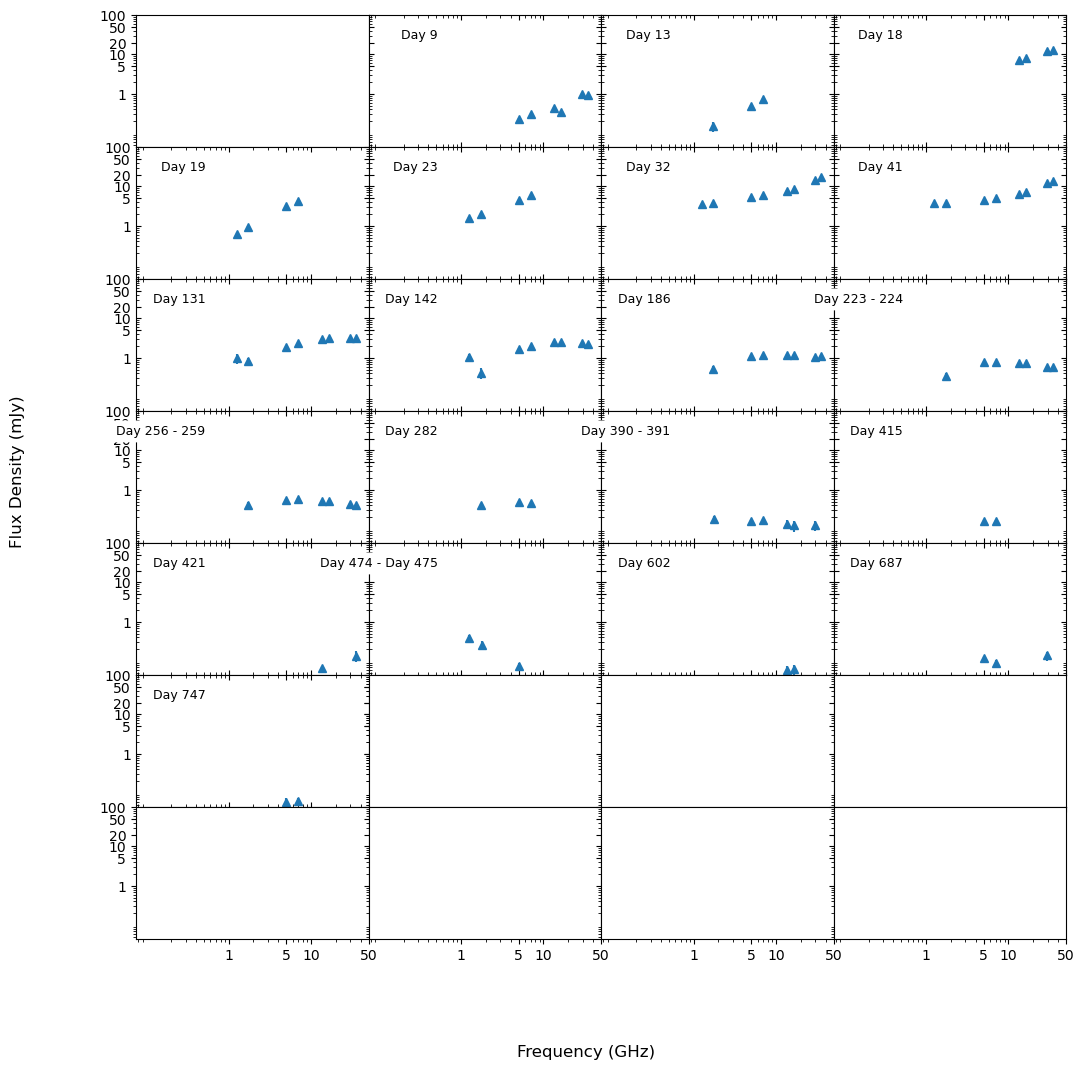

In [485]:
#putting them all in a list
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,
       df11,  df12, df14, df16, df17, df19, df20, df22, df24, df25, df26]


#the days by the list so they can all be defined
annotations = ['Day 1','Day 9','Day 13','Day 18','Day 19','Day 23','Day 32','Day 41','Day 131',
               'Day 142','Day 186','Day 223 - 224','Day 256 - 259','Day 282','Day 390 - 391',
               'Day 415','Day 421','Day 474 - Day 475','Day 602','Day 687','Day 747',]

#making the figure (7,4) is the (rows, columns)
fig, ax = plt.subplots(7, 4, sharex='all', sharey='all')
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0, wspace=0)

#loop for each of the datasets
for idx, (df, label) in enumerate(zip(dfs, annotations)):
    row, col = divmod(idx, 4)
    mask = df['Flux (mJy)'] > 3 * df['eFlux (mJy)'] #don't show the non-detections
    if mask.any():
        ax[row, col].errorbar(df['Freq (GHz)'][mask], df['Flux (mJy)'][mask], yerr=df['eFlux (mJy)'][mask], fmt='^')
        ax[row, col].set_xscale('log')
        ax[row, col].set_yscale('log')
        ax[row, col].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
        ax[row, col].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
        ax[row, col].annotate(label, xy=(50, 85), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
        ax[row, col].tick_params(axis='both', which='both', direction='in', top=True, right=True)

fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();

### Now to sort it out

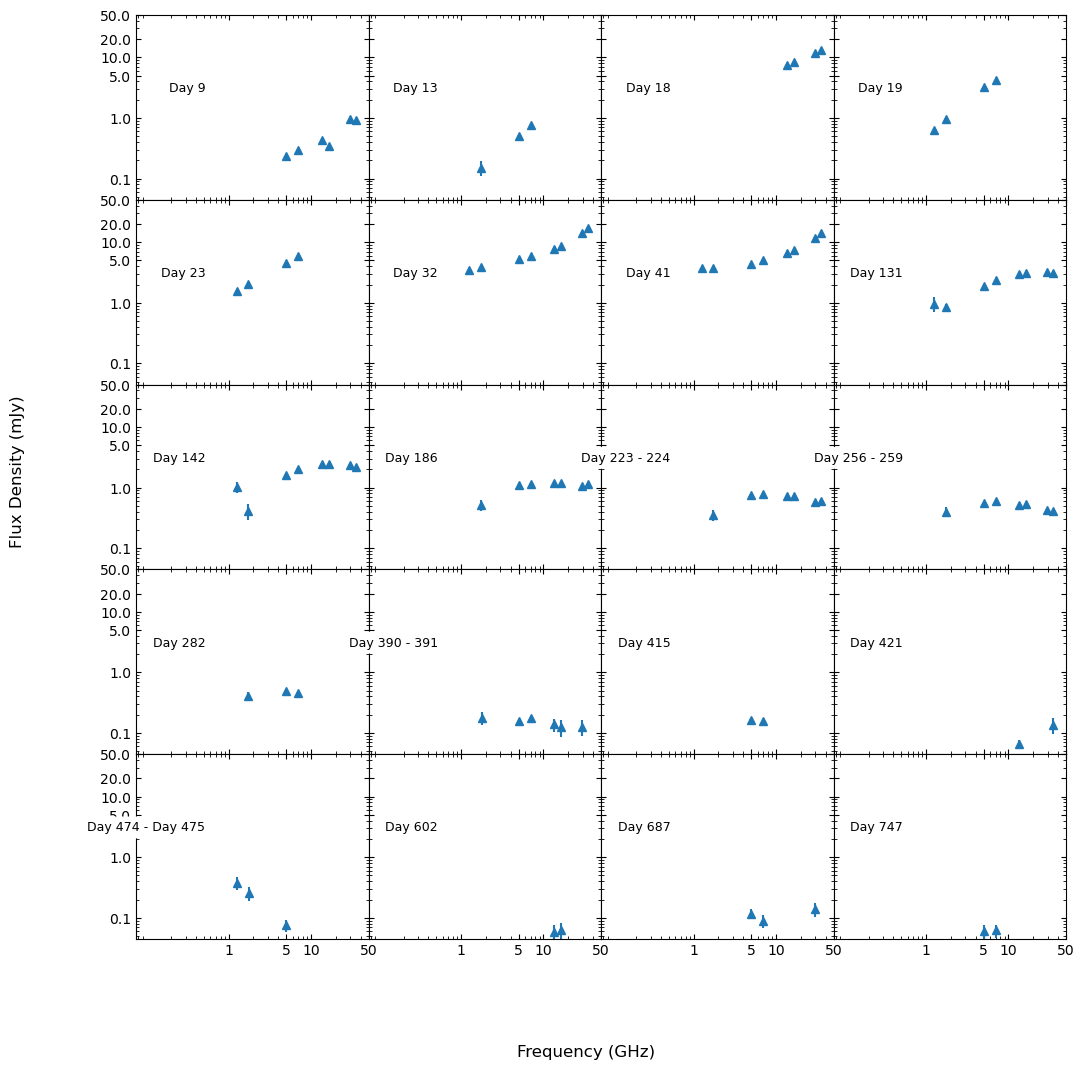

In [487]:
dfs = [ df2, df3, df4, df5, df6, df7, df8, df9, df10,
       df11, df12,  df14,  df16, df17,  df19, df20, df22, df24, df25, df26]


#the days by the list so they can all be defined
annotations = [ 'Day 9','Day 13','Day 18','Day 19','Day 23','Day 32','Day 41','Day 131',
               'Day 142','Day 186','Day 223 - 224','Day 256 - 259','Day 282','Day 390 - 391',
               'Day 415','Day 421','Day 474 - Day 475','Day 602','Day 687','Day 747',]

#making the figure (7,4) is the (rows, columns)
fig, ax = plt.subplots(5, 4, sharex='all', sharey='all')
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0, wspace=0)

#loop for each of the datasets
for idx, (df, label) in enumerate(zip(dfs, annotations)):
    row, col = divmod(idx, 4)
    mask = df['Flux (mJy)'] > 3 * df['eFlux (mJy)'] #don't show the non-detections
    if mask.any():
        ax[row, col].errorbar(df['Freq (GHz)'][mask], df['Flux (mJy)'][mask], yerr=df['eFlux (mJy)'][mask], fmt='^')
        ax[row, col].set_xscale('log')
        ax[row, col].set_yscale('log')
        ax[row, col].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
        ax[row, col].set_yticks([.1, 1, 5, 10, 20, 50], labels=['0.1','1.0', '5.0', '10.0', '20.0', '50.0'])
        ax[row, col].annotate(label, xy=(50, 85), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
        ax[row, col].tick_params(axis='both', which='both', direction='in', top=True, right=True)

fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();

# Now to find all of the alphas

In [488]:
def error(err, freq, flux):
    yerr = []
    for i in range(len(freq)):
        if freq[i] < 10:
            pl = np.sqrt(err[i]**2 + (flux[i]*0.05)**2)
            yerr.append(pl)
        else:
            pl =np.sqrt(err[i]**2 + (flux[i]*0.1)**2)
            yerr.append(pl)

    return(yerr)


In [489]:
#CHI(freq_F23,fw_tBPL2(freq_F23))

#O = observed values (the measured flux densities)
#E = expected values (the modelled flux densities)


def cs(O,E):
    X=[]
    for i in range(len(E)):
        X.append(((O[i]-E[i])**2) / E[i])
    XS = np.sum(X)
        
    return(XS)

#This gives chi squared, but we want reduced chi squared so just divide by the number of free

In [490]:
#Xhi = cs(flux,BPL_ww(freq))
#print("The chi squared is",Xhi)

## Day 9 (df2)

In [491]:
#(work for anything with 3+ points)
mask = df2['Flux (mJy)'] > 3 * df2['eFlux (mJy)']  # apply detection threshold

x2 = df2['Freq (GHz)'][mask].values.tolist()
y2 = df2['Flux (mJy)'][mask].values.tolist()
yerr2 = df2['eFlux (mJy)'][mask].values.tolist()


In [492]:
yerr2 = error(yerr2, x2, y2)

In [493]:
PL2 =  PowerLaw1D(amplitude = y2[0], x_0= x2[0], alpha= -.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit2 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model2 = fit2(PL2, x2, y2)


#weight is 1/error^2
y_weight2 = 1/ (np.power(yerr2, 2))  

# fit the data using the uncertainties as weights
fit_model_weights2 = fit2(PL2, x2, y2, weights=y_weight2)

fit_model_weights2


<PowerLaw1D(amplitude=0.25156341, x_0=5.51726168, alpha=-0.50742601)>

In [494]:
fit2.fit_info

{'nfev': 11,
 'fvec': array([ 25.1221768 , -42.33758679, -17.50984675,  63.73181718,
        -38.12481369, -30.5143415 ]),
 'fjac': array([[-4.62583590e+03,  1.71289480e+02,  1.06961798e+02,
          2.48525293e-01,  5.08801567e-02,  6.21989735e-02],
        [ 1.71289480e+02,  4.02379421e+02,  1.50711631e-13,
          7.54670697e-01,  2.40052124e-01,  3.24225346e-01],
        [ 1.06961798e+02,  1.25342964e-14, -1.05779480e-14,
          7.36405441e-01,  3.63943759e-01,  4.37035932e-01]]),
 'ipvt': array([1, 3, 2], dtype=int32),
 'qtf': array([-4.74265908e-03, -1.29116887e-04, -4.43506783e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 4.77830747e+24,  2.06650100e+26, -6.43724171e+09],
        [ 2.06650100e+26,  8.93711087e+27, -2.78394944e+11],
        [-6.43724171e+09, -2.78394944e+11,  1.48484266e-05]]),
 'njev': 4,
 'cov_x': array([[ 4.77830747e+24,  2.06650100e

In [495]:
#taking fvec
fvec2 = np.array([ 25.1221768 , -42.33758679, -17.50984675,  63.73181718,
        -38.12481369, -30.5143415 ])
var2 = np.var(fvec2)

#taking cov_x
cov_x2 = np.array([[ 4.77830747e+24,  2.06650100e+26, -6.43724171e+09],
        [ 2.06650100e+26,  8.93711087e+27, -2.78394944e+11],
        [-6.43724171e+09, -2.78394944e+11,  1.48484266e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag2 = stand(cov_x2*var2) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag2[2]) #Just showing the standard deviation on the slope


The error/standard deviation is 0.1485318779078096


In [497]:
"""Xhi = cs(df2['Flux (mJy)'], PL2( df2["Freq (GHz)"] ))
print("The chi squared is", Xhi/(6-4))""";

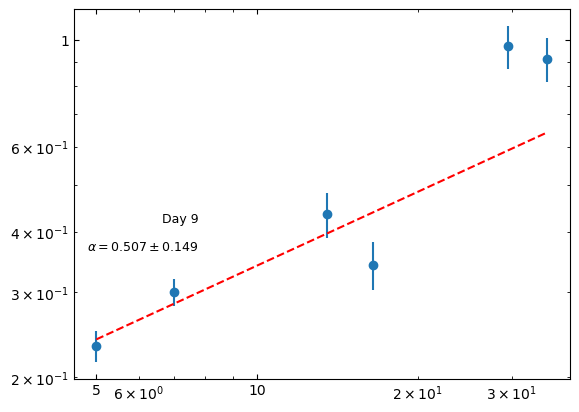

In [498]:
#plotting to check
fig,ax = plt.subplots()
mask = df2['Flux (mJy)'] > 3 * df2['eFlux (mJy)']  # apply detection threshold
mask2 = df2['Flux (mJy)'] < 3 * df2['eFlux (mJy)']  # apply non-detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df2['Freq (GHz)'][mask], df2['Flux (mJy)'][mask], yerr=yerr2, fmt='o')
    ax.scatter(df2['Freq (GHz)'][mask2], (df2['Flux (mJy)'][mask2] + 3*df2['eFlux (mJy)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 9', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df2['Freq (GHz)'][mask], fit_model_weights2(df2['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.507 \\pm 0.149}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 13 (df3)

In [499]:
#(work for anything with 3+ points)
mask = df3['Flux (mJy)'] > 3 * df3['eFlux (mJy)']  # apply detection threshold

x3 = df3['Freq (GHz)'][mask].values.tolist()
y3 = df3['Flux (mJy)'][mask].values.tolist()
yerr3 = df3['eFlux (mJy)'][mask].values.tolist()


In [500]:
yerr3 = error(yerr3, x3, y3)

In [501]:
PL3 =  PowerLaw1D(amplitude = y3[0], x_0= x3[0], alpha= -1.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit3 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model3 = fit3(PL3, x3, y3)


#weight is 1/error^2
y_weight3 = 1/ (np.power(yerr3, 2))  

# fit the data using the uncertainties as weights
fit_model_weights3 = fit3(PL3, x3, y3, weights=y_weight3)

fit_model_weights3


<PowerLaw1D(amplitude=14.23161585, x_0=83.76845146, alpha=-1.18693893)>

In [502]:
fit3.fit_info

{'nfev': 15,
 'fvec': array([-3.70765675,  1.932965  , -2.00029288]),
 'fjac': array([[-2.12724318e+03, -5.48005186e+01,  1.10506232e+01],
        [-5.48005186e+01, -4.00941616e+00,  8.08505982e-01],
        [ 1.10506232e+01,  8.08505982e-01,  2.22044605e-15]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([4.42849928e-05, 3.62850622e-06, 4.63510991e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': None,
 'njev': 8,
 'cov_x': array([[8.24752710e+27, 4.08998439e+28, 2.55353737e+10],
        [4.08998439e+28, 2.02824096e+29, 1.26631023e+11],
        [2.55353737e+10, 1.26631023e+11, 4.15831929e-05]])}

In [503]:
#taking fvec
fvec3 = np.array([-3.70765675,  1.932965  , -2.00029288])
var3 = np.var(fvec3)

#taking cov_x
cov_x3 = np.array([[8.24752710e+27, 4.08998439e+28, 2.55353737e+10],
        [4.08998439e+28, 2.02824096e+29, 1.26631023e+11],
        [2.55353737e+10, 1.26631023e+11, 4.15831929e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag3 = stand(cov_x3*var3) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag3[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.015229973039123074


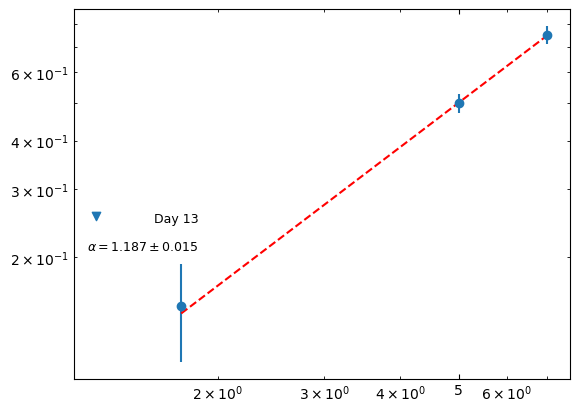

In [504]:
#plotting to check
fig,ax = plt.subplots()
mask = df3['Flux (mJy)'] > 3 * df3['eFlux (mJy)']  # apply detection threshold
mask2 = df3['Flux (mJy)'] < 3 * df3['eFlux (mJy)']  # apply non-detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df3['Freq (GHz)'][mask], df3['Flux (mJy)'][mask], yerr=yerr3, fmt='o')
    ax.scatter(df3['Freq (GHz)'][mask2], (df3['Flux (mJy)'][mask2] + 3*df3['eFlux (mJy)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 13', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df3['Freq (GHz)'][mask], fit_model_weights3(df3['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 1.187 \\pm 0.015}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 18 (df4)

In [505]:
#(work for anything with 3+ points)
mask = df4['Flux (mJy)'] > 3 * df4['eFlux (mJy)']  # apply detection threshold

x4 = df4['Freq (GHz)'][mask].values.tolist()
y4 = df4['Flux (mJy)'][mask].values.tolist()
yerr4 = df4['eFlux (mJy)'][mask].values.tolist()


In [506]:
yerr4 = error(yerr4, x4, y4)

In [507]:
PL4 =  PowerLaw1D(amplitude = y4[0], x_0= x4[0], alpha= -2) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit4 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model4 = fit4(PL4, x4, y4)


#weight is 1/error^2
y_weight4 = 1/ (np.power(yerr4, 2))  

# fit the data using the uncertainties as weights
fit_model_weights4 = fit4(PL4, x4, y4, weights=y_weight4)

fit_model_weights4


<PowerLaw1D(amplitude=148.05310386, x_0=2016.23074634, alpha=-0.59900762)>

In [508]:
fit4.fit_info

{'nfev': 23,
 'fvec': array([ 0.00351433,  0.00219582, -0.04546443,  0.03975301]),
 'fjac': array([[-1.00872540e+02, -1.44151133e-01,  6.34056108e-03,
          3.10708318e-01],
        [-1.44151133e-01, -1.10758361e-02,  4.87176296e-04,
          7.62105789e-01],
        [ 6.34056108e-03,  4.87176296e-04,  4.66332987e-19,
          5.81238194e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([-1.43409569e-06, -1.10188580e-07,  1.57907829e-02]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 8.89665979e+33,  2.02263424e+35, -6.39592134e+15],
        [ 2.02263424e+35,  4.59841036e+36, -1.45409736e+17],
        [-6.39592134e+15, -1.45409736e+17,  2.13434320e-02]]),
 'njev': 17,
 'cov_x': array([[ 8.89665979e+33,  2.02263424e+35, -6.39592134e+15],
        [ 2.02263424e+35,  4.59841036e+36, -1.45409736e+17],
        [-6.39592134e+15, -1.45409736e+17,  2.13434320e-0

In [512]:
#taking fvec
fvec4 = np.array([ 0.00351433,  0.00219582, -0.04546443,  0.03975301])
var4 = np.var(fvec4)

#taking cov_x
cov_x4 = np.array([[ 8.89665979e+33,  2.02263424e+35, -6.39592134e+15],
        [ 2.02263424e+35,  4.59841036e+36, -1.45409736e+17],
        [-6.39592134e+15, -1.45409736e+17,  2.13434320e-02]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag4 = stand(cov_x4*var4) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag4[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.004421898848154644


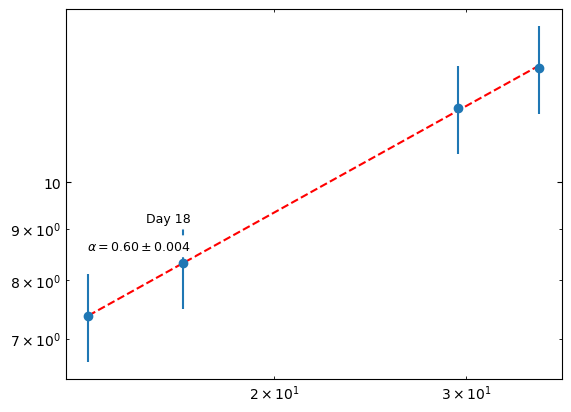

In [513]:
#plotting to check
fig,ax = plt.subplots()
mask = df4['Flux (mJy)'] > 3 * df4['eFlux (mJy)']  # apply detection threshold
mask2 = df4['Flux (mJy)'] < 3 * df4['eFlux (mJy)']  # apply nondetection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df4['Freq (GHz)'][mask], df4['Flux (mJy)'][mask], yerr=yerr4, fmt='o')
    ax.scatter(df4['Freq (GHz)'][mask2], (df4['Flux (mJy)'][mask2] + 3*df4['eFlux (mJy)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 18', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df4['Freq (GHz)'][mask], fit_model_weights4(df4['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.60 \\pm 0.004}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 19 (df5)

In [514]:
#(work for anything with 3+ points)
mask = df5['Flux (mJy)'] > 3 * df5['eFlux (mJy)']  # apply detection threshold

x5 = df5['Freq (GHz)'][mask].values.tolist()
y5 = df5['Flux (mJy)'][mask].values.tolist()
yerr5 = df5['eFlux (mJy)'][mask].values.tolist()


In [515]:
yerr5 = error(yerr5, x5, y5)

In [516]:
PL5 =  PowerLaw1D(amplitude = y5[0], x_0= x5[0], alpha= .25) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit5 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model5 = fit5(PL5, x5, y5)


#weight is 1/error^2
y_weight5 = 1/ (np.power(yerr5, 2))  

# fit the data using the uncertainties as weights
fit_model_weights5 = fit5(PL5, x5, y5, weights=y_weight5)

fit_model_weights5


<PowerLaw1D(amplitude=0.68800312, x_0=1.32913326, alpha=-1.13129333)>

In [517]:
fit5.fit_info

{'nfev': 18,
 'fvec': array([ 5.23410792, -3.68307904, -5.61289475,  6.83028046]),
 'fjac': array([[-4.63624415e+02,  1.51399934e+02,  2.71495981e+02,
          3.16782119e-01],
        [ 1.51399934e+02, -1.82864401e+02, -8.80174046e-15,
         -7.51802754e-01],
        [ 2.71495981e+02,  1.06837597e-14,  9.37046799e-15,
         -6.92122459e-01]]),
 'ipvt': array([1, 3, 2], dtype=int32),
 'qtf': array([1.13752035e-04, 1.36443301e-09, 8.67167932e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[3.90545512e+27, 6.66921233e+27, 3.89645341e+11],
        [6.66921233e+27, 1.13887861e+28, 6.65384042e+11],
        [3.89645341e+11, 6.65384042e+11, 6.87795770e-05]]),
 'njev': 10,
 'cov_x': array([[3.90545512e+27, 6.66921233e+27, 3.89645341e+11],
        [6.66921233e+27, 1.13887861e+28, 6.65384042e+11],
        [3.89645341e+11, 6.65384042e+11, 6.87795770e-05]])}

In [518]:
#taking fvec
fvec5 = np.array([ 5.23410792, -3.68307904, -5.61289475,  6.83028046])
var5 = np.var(fvec5)

#taking cov_x
cov_x5 = np.array([[3.90545512e+27, 6.66921233e+27, 3.89645341e+11],
        [6.66921233e+27, 1.13887861e+28, 6.65384042e+11],
        [3.89645341e+11, 6.65384042e+11, 6.87795770e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag5 = stand(cov_x5*var5) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag5[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.044891872552450855


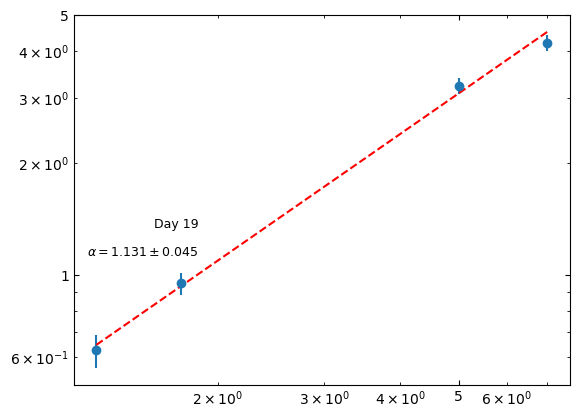

In [519]:
#plotting to check
fig,ax = plt.subplots()
mask = df5['Flux (mJy)'] > 3 * df5['eFlux (mJy)']  # apply detection threshold

mask2 = df5['Flux (mJy)'] < 3 * df5['eFlux (mJy)']  # apply nondetection threshold

if mask.any():  # proceed only if at least one detection
    ax.errorbar(df5['Freq (GHz)'][mask], df5['Flux (mJy)'][mask], yerr=yerr5, fmt='o')
    ax.scatter(df5['Freq (GHz)'][mask2], (df5['Flux (mJy)'][mask2] + 3*df5['eFlux (mJy)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 19', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df5['Freq (GHz)'][mask], fit_model_weights5(df5['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 1.131 \\pm 0.045}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 23 (df6)

In [520]:
#(work for anything with 3+ points)
mask = df6['Flux (mJy)'] > 3 * df6['eFlux (mJy)']  # apply detection threshold

x6 = df6['Freq (GHz)'][mask].values.tolist()
y6 = df6['Flux (mJy)'][mask].values.tolist()
yerr6 = df6['eFlux (mJy)'][mask].values.tolist()


In [521]:
yerr6 = error(yerr6, x6,y6)

In [522]:
PL6 =  PowerLaw1D(amplitude = y6[0], x_0= x6[0], alpha= -2.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit6 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model6 = fit6(PL6, x6, y6)


#weight is 1/error^2
y_weight6 = 1/ (np.power(yerr6, 2))  

# fit the data using the uncertainties as weights
fit_model_weights6 = fit6(PL6, x6, y6, weights=y_weight6)

fit_model_weights6


<PowerLaw1D(amplitude=96.31009337, x_0=268.80872904, alpha=-0.76705901)>

In [523]:
fit6.fit_info

{'nfev': 39,
 'fvec': array([-0.15253043,  0.15135875,  0.17672557, -0.25783288]),
 'fjac': array([[-1.27858361e+03, -2.65555965e+00,  7.29851277e-01,
          1.92538786e-01],
        [-2.65555965e+00, -2.91323029e-01,  8.00669210e-02,
          6.97738972e-01],
        [ 7.29851277e-01,  8.00669210e-02,  4.22076438e-17,
          1.64398987e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([-2.53311313e-05, -2.77890270e-06, -4.77319487e-03]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[4.24008345e+31, 1.54275191e+32, 6.93381684e+12],
        [1.54275191e+32, 5.61329390e+32, 2.52286524e+13],
        [6.93381684e+12, 2.52286524e+13, 5.25737339e-05]]),
 'njev': 26,
 'cov_x': array([[4.24008345e+31, 1.54275191e+32, 6.93381684e+12],
        [1.54275191e+32, 5.61329390e+32, 2.52286524e+13],
        [6.93381684e+12, 2.52286524e+13, 5.25737339e-05]])}

In [524]:
#taking fvec
fvec6 = np.array([-0.15253043,  0.15135875,  0.17672557, -0.25783288])
var6 = np.var(fvec6)

#taking cov_x
cov_x6 = np.array([[4.24008345e+31, 1.54275191e+32, 6.93381684e+12],
        [1.54275191e+32, 5.61329390e+32, 2.52286524e+13],
        [6.93381684e+12, 2.52286524e+13, 5.25737339e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag6 = stand(cov_x6*var6) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag6[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.0013670751966013916


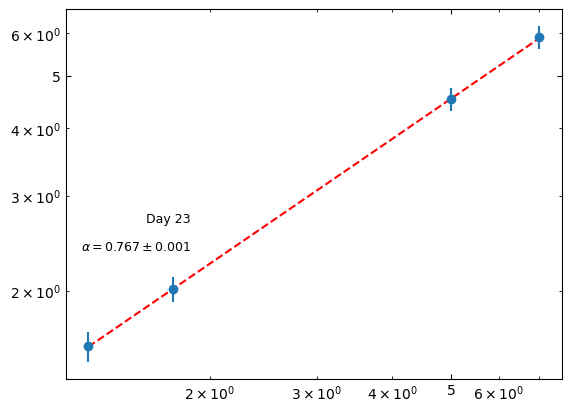

In [526]:
#plotting to check
fig,ax = plt.subplots()
mask = df6['Flux (mJy)'] > 3 * df6['eFlux (mJy)']  # apply detection threshold
mask2 = df6['Flux (mJy)'] < 3 * df6['eFlux (mJy)']  # apply nondetection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df6['Freq (GHz)'][mask], df6['Flux (mJy)'][mask], yerr=yerr6, fmt='o')
    ax.scatter(df6['Freq (GHz)'][mask2], (df6['Flux (mJy)'][mask2] + 3*df6['eFlux (mJy)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 23', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df6['Freq (GHz)'][mask], fit_model_weights6(df6['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.767 \\pm 0.001}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 32 (df7)

In [527]:
#Initialize fitters
fitBPL = fitting.LevMarLSQFitter(calc_uncertainties=True)

print(fitBPL.fit_info)

#A function that will produce a broken power law for given input values
#Also fits the BPL using LevMarLSQFitter 
#Issue: not all BPL's work so I get an error when trying to fit it to the data 

def bpl_func(freq, flux, er, a1, a2):
    wt = 1 / (np.power(er,2))
    peak = np.max(flux)
    BPL = []
    
    for i in range(0,len(freq)):
        for j in range(0,len(a1)):
            bro = BrokenPowerLaw1D(peak, freq[i], alpha_1 = a1[j], alpha_2 = a2[j])
            BPL.append(bro)
        
        
    return(BPL)

{'nfev': None, 'fvec': None, 'fjac': None, 'ipvt': None, 'qtf': None, 'message': None, 'ierr': None, 'param_jac': None, 'param_cov': None}


## Broken Power

In [528]:
#(work for anything with 3+ points)
mask = df7['Flux (mJy)'] > 3 * df7['eFlux (mJy)']  # apply detection threshold

x7 = df7['Freq (GHz)'][mask].values.tolist()
y7 = df7['Flux (mJy)'][mask].values.tolist()
yerr7 = df7['eFlux (mJy)'][mask].values.tolist()


In [529]:
yerr7 = error(yerr7, x7, y7)

In [530]:
#not using powerlaw
"""

PL7 =  PowerLaw1D(amplitude = y7[0], x_0= x7[0], alpha= 4.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit7 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model7 = fit7(PL7, x7, y7)


#weight is 1/error^2
y_weight7 = 1/ (np.power(yerr7, 2))  

# fit the data using the uncertainties as weights
fit_model_weights7 = fit7(PL7, x7, y7, weights=y_weight7)

fit_model_weights7
""";

In [531]:
#fit7.fit_info

In [532]:
"""
#taking fvec
fvec7 = np.array([-0.49088803, -1.05823169, -2.44988002, -2.48637064,  0.24364801,
        -0.9883572 ,  1.84113325, -0.5406546 ])
var7 = np.var(fvec7)

#taking cov_x
cov_x7 = np.array([[5.92955387e+28, 4.06631415e+29, 6.79587059e+11],
        [4.06631415e+29, 2.78855900e+30, 4.66040876e+12],
        [6.79587059e+11, 4.66040876e+12, 7.46035305e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag7 = stand(cov_x7*var7) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag7[2]) #Just showing the standard deviation on the slope

""";

In [533]:
#Input values for function above 
#Going through a range of x values (the point where the line breaks)
#And different alpha 1 and alpha 2 values (the alpha values on either side of that break)

x_val = np.arange(1.1,40,0.5)   #Going through a range of freq values from 0.1 to 40
                                #because thats what my data ranges from, may be different for you
    
a1 = np.arange(-1,0,0.2)
a2 = np.arange(0,1,0.2)



#Will output many BPL functions 
#Check through them, if they are very far off they won't work in fitBPL
BM3 = bpl_func(x_val, y7, yerr7, a1, a2)

In [534]:
#BM3[43] worked for me and gives me a reasonable output in fitBPL
BM3[50]

<BrokenPowerLaw1D(amplitude=17.162, x_break=6.1, alpha_1=-1., alpha_2=0.)>

In [535]:
#Apply error as weighting in the function 

weight7 = 1/ (np.power(yerr7,2))
fw_BPL7 = fitBPL(BM3[50], x7, y7, weights=weight7)   
fw_BPL7

<BrokenPowerLaw1D(amplitude=5.53350494, x_break=5.9850616, alpha_1=-0.29465906, alpha_2=-0.4906798)>

In [536]:
fitBPL.fit_info

{'nfev': 7,
 'fvec': array([ 1.15798371,  0.76169152, -1.11200497, -1.35630247,  0.76219208,
        -1.06914252,  0.32045478, -0.20453043]),
 'fjac': array([[-2.04680350e+02,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  8.02758597e-01,  5.92484436e-01,
          6.73856612e-02,  0.00000000e+00],
        [ 0.00000000e+00,  2.34993346e+01,  3.94783415e-01,
          3.35507235e-01, -3.98578427e-01, -2.94175005e-01,
         -3.34577180e-02,  4.42560460e-01],
        [-2.67423688e+01, -8.49396032e+00,  1.54973973e+01,
          9.92277741e-02,  1.10125784e-01, -1.55843244e-01,
         -7.81875187e-01, -5.74689091e-01],
        [ 7.28533041e+00,  3.85338590e+00, -5.22027943e+00,
         -1.34438145e+00, -1.91455827e-01,  6.64810935e-02,
          6.77174736e-01, -6.97046707e-01]]),
 'ipvt': array([3, 4, 1, 2], dtype=int32),
 'qtf': array([-1.47205064e-05, -7.10404056e-05, -1.31389626e-05, -7.02919152e-05]),
 'message': 'Both actual and predicted relative reductions in th

In [537]:
#taking fvec
fvec7 = np.array([ 1.157978  ,  0.76168485, -1.11201039, -1.35630715,  0.76219205,
        -1.06914253,  0.32045483, -0.20452716])
var7 = np.var(fvec7)

#taking cov_x
cov_x7 = np.array([[ 6.69514421e-02,  1.86399915e-01, -2.11278808e-03,
         -6.36529952e-03],
        [ 1.86399915e-01,  5.53371442e-01, -4.65726030e-03,
         -2.33649281e-02],
        [-2.11278808e-03, -4.65726030e-03,  1.34145892e-04,
          2.43945489e-19],
        [-6.36529952e-03, -2.33649281e-02,  2.43945489e-19,
          3.34133809e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2]) #err 1
    sd4 = np.sqrt(diag[3]) #err 2
    return(sd1,sd2,sd3, sd4)

diag7 = stand(cov_x7*var7) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation of the first one is', diag7[2], diag7[3]) #Just showing the standard deviation on the slope



The error/standard deviation of the first one is 0.010676119893063852 0.05328254546793834


In [540]:
"""Xhi = cs(df7['Flux (mJy)'][mask], fw_BPL7( df7["Freq (GHz)"][mask] ))
print("The chi squared is", Xhi/(8-4))""";

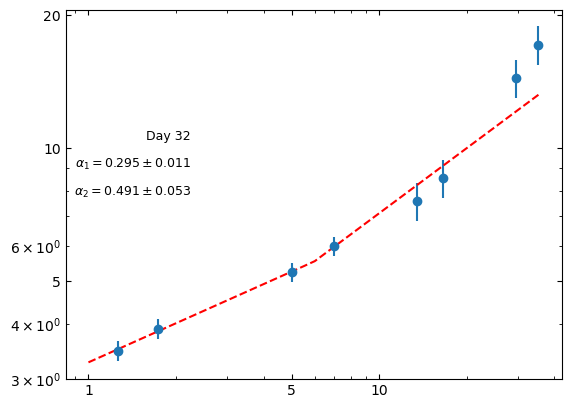

In [541]:
x_freq = np.arange(1,36,0.5)

#plotting to check
fig,ax = plt.subplots()
mask = df7['Flux (mJy)'] > 3 * df7['eFlux (mJy)']  # apply detection threshold
mask2 = df7['Flux (mJy)'] < 3 * df7['eFlux (mJy)']  # apply nondetection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df7['Freq (GHz)'][mask], df7['Flux (mJy)'][mask], yerr=yerr7, fmt='o')
    ax.scatter(df7['Freq (GHz)'][mask2], (df7['Flux (mJy)'][mask2] + 3*df7['eFlux (mJy)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 32', xy=(90, 180), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    
    #ax.plot(df7['Freq (GHz)'][mask], fw_BPL7( (df7['Freq (GHz)'][mask]) ), 'r--')
    ax.plot(x_freq, fw_BPL7(x_freq), 'r--')
    
    ax.annotate('${\u03B1_1 = 0.295 \\pm 0.011}$', xy=(90, 160), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.annotate('${\u03B1_2 = 0.491 \\pm 0.053}$', xy=(90, 140), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 41 (df8)

# Broken Power

In [542]:
#(work for anything with 3+ points)
mask = df8['Flux (mJy)'] > 3 * df8['eFlux (mJy)']  # apply detection threshold

x8 = df8['Freq (GHz)'][mask].values.tolist()
y8 = df8['Flux (mJy)'][mask].values.tolist()
yerr8 = df8['eFlux (mJy)'][mask].values.tolist()


In [543]:
yerr8 = error(yerr8, x8, y8)

In [544]:
"""PL8 =  PowerLaw1D(amplitude = y8[0], x_0= x8[0], alpha= -1) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit8 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model8 = fit8(PL8, x8, y8)


#weight is 1/error^2
y_weight8 = 1/ (np.power(yerr8, 2))  

# fit the data using the uncertainties as weights
fit_model_weights8 = fit8(PL8, x8, y8, weights=y_weight8)

fit_model_weights8
""";

In [545]:
#fit8.fit_info

In [546]:
"""#taking fvec
fvec8 = np.array([-2.51885385, -3.12306768, -3.9655854 , -3.83810395, -2.77464744,
         1.74819877,  3.46387809, -1.8508731  ])
var8 = np.var(fvec8)

#taking cov_x
cov_x8 = np.array([[ 8.40083424e+28,  9.97654125e+29, -5.91754135e+11],
        [ 9.97654125e+29,  1.18477966e+31, -7.02746819e+12],
        [-5.91754135e+11, -7.02746819e+12,  6.21423014e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag8 = stand(cov_x8*var8) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag8[2]) #Just showing the standard deviation on the slope

""";

In [547]:
#Input values for function above 
#Going through a range of x values (the point where the line breaks)
#And different alpha 1 and alpha 2 values (the alpha values on either side of that break)

x_val = np.arange(0.9,40,0.5)   #Going through a range of freq values from 0.1 to 40
                                #because thats what my data ranges from, may be different for you
    
a1 = np.arange(-1,0,0.2)
a2 = np.arange(0,1,0.2)



#Will output many BPL functions 
#Check through them, if they are very far off they won't work in fitBPL
BM3 = bpl_func(x_val, y8, yerr8, a1, a2)

In [548]:
#BM3[43] worked for me and gives me a reasonable output in fitBPL
BM3[50]

<BrokenPowerLaw1D(amplitude=13.925, x_break=5.9, alpha_1=-1., alpha_2=0.)>

In [549]:
#Apply error as weighting in the function 

weight8 = 1/ (np.power(yerr8,2))
fw_BPL8 = fitBPL(BM3[50], x8, y8, weights=weight8)   
fw_BPL8

<BrokenPowerLaw1D(amplitude=5.09431459, x_break=10.04118126, alpha_1=-0.16443503, alpha_2=-0.78931859)>

In [550]:
fitBPL.fit_info

{'nfev': 7,
 'fvec': array([-0.25658697,  0.35060431, -0.00519115, -0.14166858, -2.20247076,
         1.97538799,  2.52140028, -2.93985592]),
 'fjac': array([[-2.79480036e+02,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  7.16031387e-01,  6.51032132e-01,
          2.31422289e-01,  9.94984434e-02],
        [-3.25365078e+01, -1.72046316e+01,  9.53097062e-02,
          8.01126436e-02, -3.76761909e-01, -1.58380671e-01,
          5.81043290e-01,  6.74178118e-01],
        [ 0.00000000e+00,  3.42491543e+00,  1.46270881e+01,
          5.50478078e-01,  1.24809856e-02, -1.01122368e-01,
         -4.25142544e-01, -4.41926232e-01],
        [ 2.71437589e+00,  1.81817667e+00,  1.18748347e+00,
         -7.29115292e-01,  3.77704559e-01,  4.57118532e-01,
          5.55946626e-01,  5.00999789e-01]]),
 'ipvt': array([3, 1, 4, 2], dtype=int32),
 'qtf': array([ 6.34700333e-05, -1.77548830e-04,  4.45663896e-05, -2.48068507e-05]),
 'message': 'Both actual and predicted relative reductions in th

In [551]:
#taking fvec
fvec8 = np.array([-0.25658697,  0.35060431, -0.00519115, -0.14166858, -2.20247076,
         1.97538799,  2.52140028, -2.93985592])
var8 = np.var(fvec8)

#taking cov_x
cov_x8 = np.array([[ 1.86376919e-02,  1.68391147e-01, -5.34308428e-04,
         -1.27402025e-02],
        [ 1.68391147e-01,  1.88108139e+00, -1.33425603e-03,
         -1.52713447e-01],
        [-5.34308428e-04, -1.33425603e-03,  6.20471192e-05,
         -7.45388994e-19],
        [-1.27402025e-02, -1.52713447e-01, -7.45388994e-19,
          1.70718191e-02]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2]) #err 1
    sd4 = np.sqrt(diag[3]) #err 2
    return(sd1,sd2,sd3, sd4)

diag8 = stand(cov_x8*var8) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation of the first one is', diag8[2], diag8[3]) #Just showing the standard deviation on the slope



The error/standard deviation of the first one is 0.013615233805864347 0.22584173028995083


In [553]:
"""Xhi = cs(df8['Flux (mJy)'][mask], fw_BPL8( df8["Freq (GHz)"][mask] ))
print("The chi squared is", Xhi/(8-4))""";

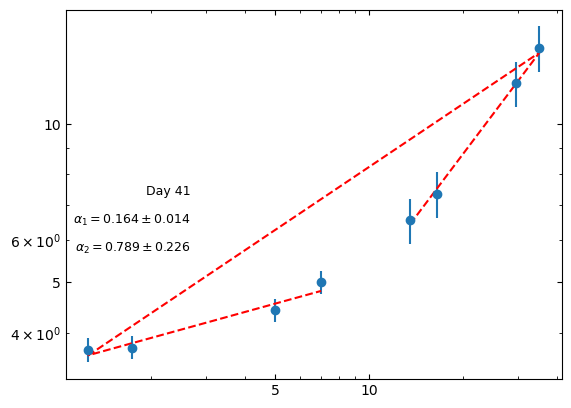

In [554]:
#plotting to check
fig,ax = plt.subplots()
mask = df8['Flux (mJy)'] > 3 * df8['eFlux (mJy)']  # apply detection threshold
mask2 = df8['Flux (mJy)'] < 3 * df8['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df8['Freq (GHz)'][mask], df8['Flux (mJy)'][mask], yerr=yerr8, fmt='o')
    ax.scatter(df8['Freq (GHz)'][mask2], (df8['Flux (mJy)'][mask2] + 3*df8['eFlux (mJy)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 41', xy=(90, 140), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    
    ax.plot(df8['Freq (GHz)'][mask], fw_BPL8(df8['Freq (GHz)'][mask]), 'r--')
    
    ax.annotate('${\u03B1_1 = 0.164 \\pm 0.014}$', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.annotate('${\u03B1_2 = 0.789 \\pm 0.226}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 131 (df9)

# Broken power?

In [555]:
#(work for anything with 3+ points)
mask = df9['Flux (mJy)'] > 3 * df9['eFlux (mJy)']  # apply detection threshold

x9 = df9['Freq (GHz)'][mask].values.tolist()
y9 = df9['Flux (mJy)'][mask].values.tolist()
yerr9 = df9['eFlux (mJy)'][mask].values.tolist()


In [556]:
yerr9 = error(yerr9, x9, y9)

In [557]:
"""PL9 =  PowerLaw1D(amplitude = y9[0], x_0= x9[0], alpha= -1) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit9 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model9 = fit9(PL9, x9, y9)


#weight is 1/error^2
y_weight9 = 1/ (np.power(yerr9, 2))  

# fit the data using the uncertainties as weights
fit_model_weights9 = fit9(PL9, x9, y9, weights=y_weight9)

fit_model_weights9
""";

In [558]:
#fit9.fit_info

In [559]:
"""
#taking fvec
fvec9 = np.array([-9.99524347e-01,  1.28451999e+00,  1.03449612e+01,  1.46449244e+01,
         1.68692864e-02,  1.83179162e+01, -2.28521390e+00, -1.28197332e+01])
var9 = np.var(fvec9)

#taking cov_x
cov_x9 = np.array([[3.52520001e+27, 3.40795249e+28, 2.45943897e+11],
        [3.40795249e+28, 3.29460461e+29, 2.37763847e+12],
        [2.45943897e+11, 2.37763847e+12, 5.94685164e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag9 = stand(cov_x9*var9) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag9[2]) #Just showing the standard deviation on the slope

""";

In [560]:
#Input values for function above 
#Going through a range of x values (the point where the line breaks)
#And different alpha 1 and alpha 2 values (the alpha values on either side of that break)

x_val = np.arange(0.9,40,0.5)   #Going through a range of freq values from 0.1 to 40
                                #because thats what my data ranges from, may be different for you
    
a1 = np.arange(-1,0,0.2)
a2 = np.arange(0,1,0.2)



#Will output many BPL functions 
#Check through them, if they are very far off they won't work in fitBPL
BM3 = bpl_func(x_val, y9, yerr9, a1, a2)

In [561]:
#BM3[43] worked for me and gives me a reasonable output in fitBPL
BM3[50]

<BrokenPowerLaw1D(amplitude=3.164, x_break=5.9, alpha_1=-1., alpha_2=0.)>

In [562]:
#Apply error as weighting in the function 

weight9 = 1/ (np.power(yerr9,2))
fw_BPL9 = fitBPL(BM3[50], x9, y9, weights=weight9)   
fw_BPL9

<BrokenPowerLaw1D(amplitude=2.32252459, x_break=6.7525004, alpha_1=-0.73095738, alpha_2=-0.21875885)>

In [563]:
fitBPL.fit_info

{'nfev': 6,
 'fvec': array([-3.44965708, -2.77415523,  0.42250453,  2.16606848, -3.80127609,
         0.78378499, -0.04994994,  0.57286339]),
 'fjac': array([[-1.21145762e+02,  1.05009441e-01,  1.13043192e-01,
          1.20432320e-01,  3.16954370e-02,  2.00724906e-01,
          7.37579637e-01,  6.04372290e-01],
        [-6.18401132e+01,  7.84439698e+01,  8.06198956e-02,
          8.58896578e-02, -1.68251088e-01, -8.33137058e-01,
         -2.68898814e-01,  4.31024905e-01],
        [ 2.06526028e+01,  1.62811660e+01,  7.59788821e+01,
          6.33997034e-01,  6.43167855e-02,  2.97008328e-01,
         -2.34138191e-01, -4.20465163e-01],
        [ 2.16073634e+01, -6.97696742e+00, -1.90053372e+00,
          7.63334009e+00, -1.11520793e-01, -4.99373982e-01,
          6.51041603e-01, -5.58678471e-01]]),
 'ipvt': array([1, 3, 4, 2], dtype=int32),
 'qtf': array([-4.57471581e-07,  1.43475797e-06, -5.21654852e-05, -1.26759044e-05]),
 'message': 'Both actual and predicted relative reductions in th

In [564]:
#taking fvec
fvec9 = np.array([-3.44965708, -2.77415523,  0.42250453,  2.16606848, -3.80127609,
         0.78378499, -0.04994994,  0.57286339])
var9 = np.var(fvec9)

#taking cov_x
cov_x9 = np.array([[4.59478700e-04, 2.40049000e-03, 1.08148444e-04, 1.07929764e-04],
        [2.40049000e-03, 1.71621137e-02, 1.43733322e-03, 4.29292653e-04],
        [1.08148444e-04, 1.43733322e-03, 2.90349654e-04, 1.35525272e-20],
        [1.07929764e-04, 4.29292653e-04, 1.35525272e-20, 1.83964763e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2]) #err 1
    sd4 = np.sqrt(diag[3]) #err 2
    return(sd1,sd2,sd3, sd4)

diag9 = stand(cov_x9*var9) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation of the first one is', diag9[2], diag9[3]) #Just showing the standard deviation on the slope



The error/standard deviation of the first one is 0.03572453450839599 0.028436310313784078


In [277]:
Xhi = cs(df9['Flux (mJy)'][mask], fw_BPL9( df9["Freq (GHz)"][mask] ))
print("The chi squared is", Xhi/(8-4))

The chi squared is 0.01990867082205705


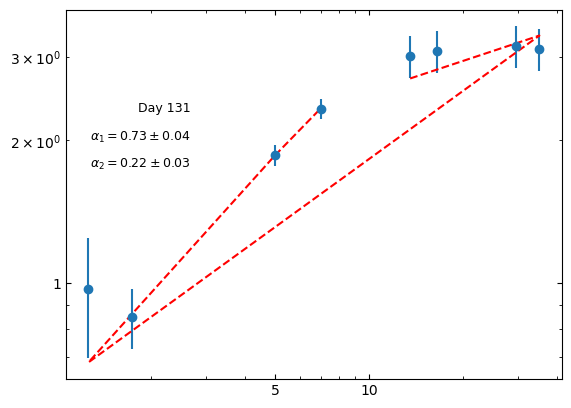

In [565]:
#plotting to check
fig,ax = plt.subplots()
mask = df9['Flux (mJy)'] > 3 * df9['eFlux (mJy)']  # apply detection threshold
mask2 = df9['Flux (mJy)'] < 3 * df9['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df9['Freq (GHz)'][mask], df9['Flux (mJy)'][mask], yerr=yerr9, fmt='o')
    ax.scatter(df9['Freq (GHz)'][mask2], (df9['Flux (mJy)'][mask2] + 3*df9['eFlux (mJy)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 131', xy=(90, 200), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    
    ax.plot(df9['Freq (GHz)'][mask], fw_BPL9(df9['Freq (GHz)'][mask]), 'r--')
    
    ax.annotate('${\u03B1_1 = 0.73 \\pm 0.04}$', xy=(90, 180), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.annotate('${\u03B1_2 = 0.22 \\pm 0.03}$', xy=(90, 160), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
   
    #ax.annotate('${\u03B1 = 0.465 \\pm 0.074}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 142 (df10)

In [566]:
#(work for anything with 3+ points)
mask = df10['Flux (mJy)'] > 3 * df10['eFlux (mJy)']  # apply detection threshold

x10 = df10['Freq (GHz)'][mask].values.tolist()
y10 = df10['Flux (mJy)'][mask].values.tolist()
yerr10 = df10['eFlux (mJy)'][mask].values.tolist()


In [567]:
yerr10 = error(yerr10, x10, y10)

In [568]:
"""
PL10 =  PowerLaw1D(amplitude = y10[0], x_0= x10[0], alpha= 4.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit10 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model10 = fit10(PL10, x10, y10)


#weight is 1/error^2
y_weight10 = 1/ (np.power(yerr10, 2))  

# fit the data using the uncertainties as weights
fit_model_weights10 = fit10(PL10, x10, y10, weights=y_weight10)

fit_model_weights10
""";

In [569]:
#fit10.fit_info

In [570]:
"""
#taking fvec
fvec10 = np.array([ -2.28651914,   0.16549462,  12.72121007,  22.37214669,
         -1.42648817,  41.2821875 ,  -5.78326984, -20.23732543])
var10 = np.var(fvec10)

#taking cov_x
cov_x10 = np.array([[ 6.20283727e+27,  1.11106102e+29, -5.24269552e+11],
        [ 1.11106102e+29,  1.99014828e+30, -9.39079067e+12],
        [-5.24269552e+11, -9.39079067e+12,  7.34318554e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag10 = stand(cov_x10*var10) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag10[2]) #Just showing the standard deviation on the slope
""";


In [571]:
#Input values for function above 
#Going through a range of x values (the point where the line breaks)
#And different alpha 1 and alpha 2 values (the alpha values on either side of that break)

x_val = np.arange(0.9,40,0.5)   #Going through a range of freq values from 0.1 to 40
                                #because thats what my data ranges from, may be different for you
    
a1 = np.arange(-1,0,0.2)
a2 = np.arange(0,1,0.2)



#Will output many BPL functions 
#Check through them, if they are very far off they won't work in fitBPL
BM3 = bpl_func(x_val, y10, yerr10, a1, a2)

In [572]:
#BM3[43] worked for me and gives me a reasonable output in fitBPL
BM3[43]

<BrokenPowerLaw1D(amplitude=2.475, x_break=4.9, alpha_1=-0.4, alpha_2=0.6)>

In [573]:
#Apply error as weighting in the function 

weight10 = 1/ (np.power(yerr10,2))
fw_BPL10 = fitBPL(BM3[43], x10, y10, weights=weight10)   
fw_BPL10

<BrokenPowerLaw1D(amplitude=1.99483681, x_break=5.92369349, alpha_1=-1.16893446, alpha_2=-0.09691784)>

In [574]:
fitBPL.fit_info

{'nfev': 10,
 'fvec': array([ -4.73316755,  -4.42781129,  -0.59041579,   3.62295555,
        -13.48021337,   3.69950281,  -0.1091477 ,   0.90709365]),
 'fjac': array([[-1.59694955e+02,  1.12598938e-01,  1.29611820e-01,
          1.52588949e-01,  1.95714339e-02,  9.31211000e-02,
          7.39132998e-01,  6.15657004e-01],
        [ 4.94313748e+01,  1.12751426e+02,  5.06176196e-01,
          6.69612910e-01, -1.23421599e-02, -5.87241340e-02,
         -4.66112892e-01, -9.78436070e-02],
        [-3.30764506e+01,  1.45010531e+01, -4.12655602e+01,
          1.20909334e-01,  2.15518545e-01,  7.93402944e-01,
          2.74494505e-01, -4.76986041e-01],
        [ 3.72297852e+01, -1.40368956e+01,  1.56136439e+01,
          1.94909364e+01, -1.72540857e-01, -6.13337581e-01,
          5.20793998e-01, -5.50753810e-01]]),
 'ipvt': array([1, 4, 3, 2], dtype=int32),
 'qtf': array([-1.71280409e-07, -2.59180801e-06, -6.36470495e-05,  4.89033277e-05]),
 'message': 'Both actual and predicted relative reducti

In [575]:
#taking fvec
fvec10 = np.array([ -4.73316755,  -4.42781129,  -0.59041579,   3.62295555,
        -13.48021337,   3.69950281,  -0.1091477 ,   0.90709365])
var10 = np.var(fvec10)

#taking cov_x
cov_x10 = np.array([[1.66177941e-04, 4.69165310e-04, 3.25064553e-05, 7.85758960e-05],
        [4.69165310e-04, 2.63229520e-03, 9.95981147e-04, 1.99611465e-04],
        [3.25064553e-05, 9.95981147e-04, 9.64101246e-04, 1.35525272e-20],
        [7.85758960e-05, 1.99611465e-04, 1.35525272e-20, 1.03510821e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2]) #err 1
    sd4 = np.sqrt(diag[3]) #err 2
    return(sd1,sd2,sd3, sd4)

diag10 = stand(cov_x10*var10) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation of the first one is', diag10[2], diag10[3]) #Just showing the standard deviation on the slope


The error/standard deviation of the first one is 0.16399873315554891 0.05373683055636164


In [576]:
Xhi = cs(df10['Flux (mJy)'][mask].to_numpy(), fw_BPL10( df10["Freq (GHz)"][mask].to_numpy() ))
print("The chi squared is", Xhi/(8-4))

The chi squared is 0.4047412234593929


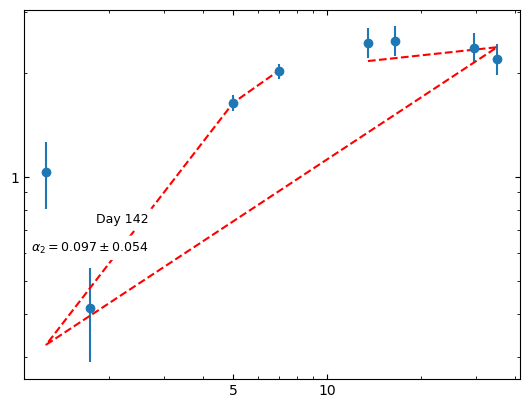

In [577]:
#plotting to check
fig,ax = plt.subplots()
mask = df10['Flux (mJy)'] > 3 * df10['eFlux (mJy)']  # apply detection threshold
mask2 = df10['Flux (mJy)'] < 3 * df10['eFlux (mJy)']  # apply nondetection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df10['Freq (GHz)'][mask], df10['Flux (mJy)'][mask], yerr=yerr10, fmt='o')
    ax.scatter(df10['Freq (GHz)'][mask2], (df10['Flux (mJy)'][mask2] + 3*df10['eFlux (mJy)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 142', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    
    ax.plot(df10['Freq (GHz)'][mask], fw_BPL10(df10['Freq (GHz)'][mask]), 'r--')

    #ax.annotate('${\u03B1 = 0.371 \\pm 0.153}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    
    ax.annotate('${\u03B1_1 = 1.169 \\pm 0.164}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.annotate('${\u03B1_2 = 0.097 \\pm 0.054}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 186 (df11)

# Broken Power law?

In [578]:
#(work for anything with 3+ points)
mask = df11['Flux (mJy)'] > 3 * df11['eFlux (mJy)']  # apply detection threshold

x11 = df11['Freq (GHz)'][mask].values.tolist()
y11 = df11['Flux (mJy)'][mask].values.tolist()
yerr11 = df11['eFlux (mJy)'][mask].values.tolist()


In [579]:
yerr11 = error(yerr11, x11, y11)

In [580]:
"""
PL11 =  PowerLaw1D(amplitude = y11[0], x_0= x11[0], alpha= -2) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit11 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model11 = fit11(PL11, x11, y11)


#weight is 1/error^2
y_weight11 = 1/ (np.power(yerr11, 2))  

# fit the data using the uncertainties as weights
fit_model_weights11 = fit11(PL11, x11, y11, weights=y_weight11)

fit_model_weights11
""";

In [581]:
#fit11.fit_info

In [582]:
"""#taking fvec
fvec11 = np.array([ -1.27159239,  -0.46760469,  15.66431115,  11.00218958,
         40.98380208,  -7.78419232, -11.60112318])
var11 = np.var(fvec11)

#taking cov_x
cov_x11 = np.array([[1.57310324e+26, 5.72669691e+28, 2.35898893e+10],
        [5.72669691e+28, 2.08473651e+31, 8.58762111e+12],
        [2.35898893e+10, 8.58762111e+12, 1.63708340e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag11 = stand(cov_x11*var11) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag11[2]) #Just showing the standard deviation on the slope
""";

In [583]:
#Input values for function above 
#Going through a range of x values (the point where the line breaks)
#And different alpha 1 and alpha 2 values (the alpha values on either side of that break)

x_val = np.arange(0.9,40,0.5)   #Going through a range of freq values from 0.1 to 40
                                #because thats what my data ranges from, may be different for you
    
a1 = np.arange(-1,0,0.2)
a2 = np.arange(0,1,0.2)



#Will output many BPL functions 
#Check through them, if they are very far off they won't work in fitBPL
BM3 = bpl_func(x_val, y11, yerr11, a1, a2)

In [584]:
#BM3[43] worked for me and gives me a reasonable output in fitBPL
BM3[43]

<BrokenPowerLaw1D(amplitude=1.207, x_break=4.9, alpha_1=-0.4, alpha_2=0.6)>

In [585]:
print(BM3[50])

Model: BrokenPowerLaw1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
    amplitude      x_break       alpha_1 alpha_2
    --------- ------------------ ------- -------
        1.207 5.8999999999999995    -1.0     0.0


In [586]:
#Apply error as weighting in the function 

weight11 = 1/ (np.power(yerr11,2))
fw_BPL11 = fitBPL(BM3[50], x11, y11, weights=weight11)   
fw_BPL11

<BrokenPowerLaw1D(amplitude=1.17754908, x_break=5.34180001, alpha_1=-0.74426105, alpha_2=0.02893122)>

In [587]:
fitBPL.fit_info

{'nfev': 6,
 'fvec': array([-3.68211720e+00, -4.57333266e+00,  4.40045647e+00, -7.28950479e-01,
         5.47762999e-10, -1.25100050e-09,  9.20747878e-01]),
 'fjac': array([[-4.08341879e+02,  1.61186780e-01,  1.94443265e-01,
          1.72849880e-01,  8.78148366e-02,  6.57523684e-01,
          6.62930869e-01],
        [ 1.41241318e+02,  2.24458534e+02,  5.52326045e-01,
          5.54292006e-01, -7.20219206e-02, -5.39272411e-01,
         -1.59772441e-01],
        [-1.79055997e+01,  1.12671613e+01, -4.72521633e+01,
          7.19839725e-02,  9.57083864e-01,  1.03545393e-01,
         -2.52838248e-01],
        [ 2.80227001e+01, -1.92721134e+01,  1.01725599e+01,
          2.68085582e+01, -4.24465886e-01,  6.29486549e-01,
         -6.25952291e-01]]),
 'ipvt': array([1, 4, 3, 2], dtype=int32),
 'qtf': array([7.14750481e-10, 1.52805825e-07, 3.61697730e-08, 9.73182912e-08]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000 and the relative

In [588]:
#taking fvec
fvec11 = np.array([-3.68211720e+00, -4.57333266e+00,  4.40045647e+00, -7.28950479e-01,
         5.47762999e-10, -1.25100050e-09,  9.20747878e-01])
var11 = np.var(fvec11)

#taking cov_x
cov_x11 = np.array([[ 2.01375176e-05,  1.18472357e-04, -1.91038034e-06,
          1.71333829e-05],
        [ 1.18472357e-04,  1.39140348e-03,  2.99544704e-04,
          1.04430278e-04],
        [-1.91038034e-06,  2.99544704e-04,  5.12361487e-04,
          0.00000000e+00],
        [ 1.71333829e-05,  1.04430278e-04,  0.00000000e+00,
          2.88149349e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2]) #err 1
    sd4 = np.sqrt(diag[3]) #err 2
    return(sd1,sd2,sd3, sd4)

diag11 = stand(cov_x11*var11) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation of the first one is', diag11[2], diag11[3]) #Just showing the standard deviation on the slope


The error/standard deviation of the first one is 0.06245984038867775 0.014812264301750174


In [589]:
Xhi = cs(df11['Flux (mJy)'][mask].to_numpy(), fw_BPL11( df11["Freq (GHz)"][mask] ))
print("The chi squared is", Xhi/(7-4))

The chi squared is 0.003018048989549374


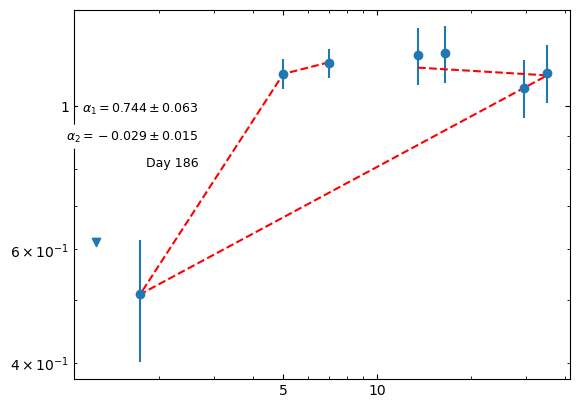

In [590]:
#plotting to check
fig,ax = plt.subplots()
mask = df11['Flux (mJy)'] > 3 * df11['eFlux (mJy)']  # apply detection threshold
mask2 = df11['Flux (mJy)'] < 3 * df11['eFlux (mJy)']  # apply nondetection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df11['Freq (GHz)'][mask], df11['Flux (mJy)'][mask], yerr=yerr11, fmt='o')
    ax.scatter(df11['Freq (GHz)'][mask2], (df11['Flux (mJy)'][mask2] + 3*df11['eFlux (mJy)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 186', xy=(90, 160), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    
    ax.plot(df11['Freq (GHz)'][mask], fw_BPL11(df11['Freq (GHz)'][mask]), 'r--')

    ax.annotate('${\u03B1_1 = 0.744 \\pm 0.063}$', xy=(90, 200), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.annotate('${\u03B1_2 = -0.029 \\pm 0.015}$', xy=(90, 180), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

    #ax.annotate('${\u03B1 = 0.078 \\pm 0.067}$', xy=(90, 150), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 223 - 224 (df12)

In [591]:
#(work for anything with 3+ points)
mask = df12['Flux (mJy)'] > 3 * df12['eFlux (mJy)']  # apply detection threshold

x12 = df12['Freq (GHz)'][mask].values.tolist()
y12 = df12['Flux (mJy)'][mask].values.tolist()
yerr12 = df12['eFlux (mJy)'][mask].values.tolist()


In [592]:
yerr12 = error(yerr12, x12, y12)

In [593]:
"""
PL12 =  PowerLaw1D(amplitude = y12[0], x_0= x12[0], alpha= -1.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit12 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model12 = fit12(PL12, x12, y12)


#weight is 1/error^2
y_weight12 = 1/ (np.power(yerr12, 2))  

# fit the data using the uncertainties as weights
fit_model_weights12 = fit12(PL12, x12, y12, weights=y_weight12)

fit_model_weights12
""";

In [594]:
#fit12.fit_info

In [595]:
"""
#taking fvec
fvec12 = np.array([ 28.81821532, -25.45896822,  17.68606807])
var12 = np.var(fvec12)

#taking cov_x
cov_x12 = np.array([[ 2.88864415e+27,  1.10651864e+30, -6.18803376e+10],
        [ 1.10651864e+30,  4.23860968e+32, -2.37037668e+13],
        [-6.18803376e+10, -2.37037668e+13,  4.14938771e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag12 = stand(cov_x12*var12) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag12[2]) #Just showing the standard deviation on the slope
""";

In [596]:
#Input values for function above 
#Going through a range of x values (the point where the line breaks)
#And different alpha 1 and alpha 2 values (the alpha values on either side of that break)

x_val = np.arange(0.9,40,0.5)   #Going through a range of freq values from 0.1 to 40
                                #because thats what my data ranges from, may be different for you
    
a1 = np.arange(-1,0,0.2)
a2 = np.arange(0,1,0.2)



#Will output many BPL functions 
#Check through them, if they are very far off they won't work in fitBPL
BM3 = bpl_func(x_val, y12, yerr12, a1, a2)

In [597]:
#BM3[43] worked for me and gives me a reasonable output in fitBPL
BM3[47]

<BrokenPowerLaw1D(amplitude=0.782, x_break=5.4, alpha_1=-0.6, alpha_2=0.4)>

In [598]:
#Apply error as weighting in the function 

weight12 = 1/ (np.power(yerr12,2))
fw_BPL12 = fitBPL(BM3[47], x12, y12, weights=weight12)   
fw_BPL12

<BrokenPowerLaw1D(amplitude=0.82124349, x_break=5.49008601, alpha_1=-0.74473797, alpha_2=0.18372245)>

In [599]:
fitBPL.fit_info

{'nfev': 6,
 'fvec': array([ 1.13026729e-13,  6.70999906e-13,  1.99403363e+00, -7.49530060e+00,
        -8.71540956e+00,  8.74268976e+00, -2.03086135e+00]),
 'fjac': array([[-8.67702918e+02,  6.49677824e-01,  6.48166470e-01,
          1.74814856e-01,  1.78071019e-01,  2.24250328e-01,
          1.92413442e-01],
        [ 2.26322559e+02, -3.60748238e+02,  6.17607899e-02,
         -2.10139377e-01, -2.84639078e-01, -6.15832105e-01,
         -5.93379749e-01],
        [-3.48533047e+01, -2.18659117e+01,  7.54393052e+01,
          2.31406580e-01,  2.35596207e-01,  2.96253704e-01,
          2.54083429e-01],
        [ 2.80093354e+01,  3.25328185e+01, -2.22894731e+01,
          4.47769316e+01,  2.88863230e-01,  6.70690413e-01,
          6.52956354e-01]]),
 'ipvt': array([1, 4, 3, 2], dtype=int32),
 'qtf': array([-1.26681254e-07,  5.55569169e-05,  1.60508452e-05, -3.22442614e-05]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1

In [600]:
#taking fvec
fvec12 = np.array([ 1.13026729e-13,  6.70999906e-13,  1.99403363e+00, -7.49530060e+00,
        -8.71540956e+00,  8.74268976e+00, -2.03086135e+00])
var12 = np.var(fvec12)

#taking cov_x
cov_x12 = np.array([[ 3.17040046e-06,  1.95827035e-05, -4.04993435e-06,
          4.01570861e-06],
        [ 1.95827035e-05,  4.98759685e-04,  1.47364700e-04,
          3.60467312e-05],
        [-4.04993435e-06,  1.47364700e-04,  2.19254020e-04,
         -1.52465931e-20],
        [ 4.01570861e-06,  3.60467312e-05, -1.52465931e-20,
          1.09348229e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2]) #err 1
    sd4 = np.sqrt(diag[3]) #err 2
    return(sd1,sd2,sd3, sd4)

diag12 = stand(cov_x12*var12) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation of the first one is', diag12[2], diag12[3]) #Just showing the standard deviation on the slope


The error/standard deviation of the first one is 0.08083696482517977 0.01805269700833788


In [601]:
Xhi = cs(df12['Flux (mJy)'][mask].to_numpy(), fw_BPL12( df12["Freq (GHz)"][mask] ))
print("The chi squared is", Xhi/(7-4))

The chi squared is 0.002544269151367904


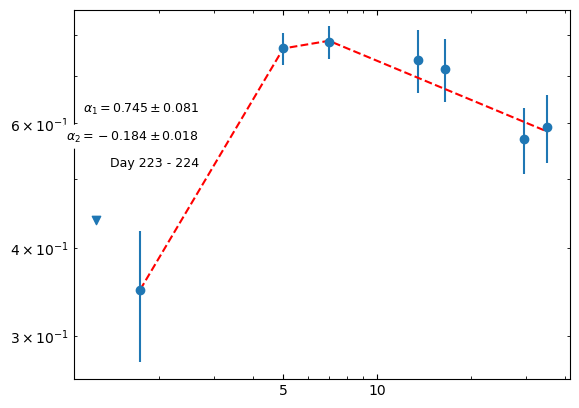

In [602]:
#plotting to check
fig,ax = plt.subplots()
mask = df12['Flux (mJy)'] > 3 * df12['eFlux (mJy)']  # apply detection threshold
mask2 = df12['Flux (mJy)'] < 3 * df12['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df12['Freq (GHz)'][mask], df12['Flux (mJy)'][mask], yerr=yerr12, fmt='o')
    ax.scatter(df12['Freq (GHz)'][mask2], (df12['Flux (mJy)'][mask2] + 3*df12['eFlux (mJy)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 223 - 224', xy=(90, 160), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    
    ax.plot(df12['Freq (GHz)'][mask], fw_BPL12(df12['Freq (GHz)'][mask]), 'r--')
    
    ax.annotate('${\u03B1_1 = 0.745 \\pm 0.081}$', xy=(90, 200), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.annotate('${\u03B1_2 = -0.184 \\pm 0.018}$', xy=(90, 180), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

    #ax.annotate('${\u03B1 = 0.342 \\pm 0.151}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 256-259 (df14)

In [603]:
#(work for anything with 3+ points)
mask = df14['Flux (mJy)'] > 3 * df14['eFlux (mJy)']  # apply detection threshold

x14 = df14['Freq (GHz)'][mask].values.tolist()
y14 = df14['Flux (mJy)'][mask].values.tolist()
yerr14 = df14['eFlux (mJy)'][mask].values.tolist()


In [604]:
yerr14 = error(yerr14, x14, y14)

In [605]:
"""
PL14 =  PowerLaw1D(amplitude = y14[0], x_0= x14[0], alpha= -1.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit14 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model14 = fit14(PL14, x14, y14)


#weight is 1/error^2
y_weight14 = 1/ (np.power(yerr14, 2))  

# fit the data using the uncertainties as weights
fit_model_weights14 = fit14(PL14, x14, y14, weights=y_weight14)

fit_model_weights14
""";

In [606]:
#fit14.fit_info

In [607]:
"""
#taking fvec
fvec14 = np.array([ 7.25140642, -3.61082977,  3.01930498])
var14 = np.var(fvec14)

#taking cov_x
cov_x14 = np.array([[2.39614191e+26, 3.43204255e+29, 2.70443896e+10],
        [3.43204255e+29, 4.91578401e+32, 3.87362266e+13],
        [2.70443896e+10, 3.87362266e+13, 5.08910744e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag14 = stand(cov_x14*var14) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag14[2]) #Just showing the standard deviation on the slope
""";


In [608]:
#Input values for function above 
#Going through a range of x values (the point where the line breaks)
#And different alpha 1 and alpha 2 values (the alpha values on either side of that break)

x_val = np.arange(0.9,40,0.5)   #Going through a range of freq values from 0.1 to 40
                                #because thats what my data ranges from, may be different for you
    
a1 = np.arange(-1,0,0.2)
a2 = np.arange(0,1,0.2)



#Will output many BPL functions 
#Check through them, if they are very far off they won't work in fitBPL
BM3 = bpl_func(x_val, y14, yerr14, a1, a2)

In [609]:
#BM3[43] worked for me and gives me a reasonable output in fitBPL
BM3[47]

<BrokenPowerLaw1D(amplitude=0.589, x_break=5.4, alpha_1=-0.6, alpha_2=0.4)>

In [610]:
#Apply error as weighting in the function 

weight14 = 1/ (np.power(yerr14,2))
fw_BPL14 = fitBPL(BM3[47], x14, y14, weights=weight14)   
fw_BPL14

<BrokenPowerLaw1D(amplitude=0.60322246, x_break=6.38017349, alpha_1=-0.31234571, alpha_2=0.2095995)>

In [611]:
fitBPL.fit_info

{'nfev': 6,
 'fvec': array([ 3.97574860e-14,  4.30802193e-13,  2.15386812e+00, -1.92365941e+00,
        -1.18139634e+01,  4.60641788e+00,  3.07835805e+00]),
 'fjac': array([[-1.33801689e+03,  6.71862505e-01,  6.04148895e-01,
          2.24557424e-01,  2.08471565e-01,  2.14959564e-01,
          1.96012551e-01],
        [ 2.01038148e+02, -3.85660598e+02,  1.76733139e-01,
         -2.42970029e-01, -3.13116913e-01, -5.84251714e-01,
         -6.02884922e-01],
        [-9.41469278e+01, -4.90771526e+01,  1.08618734e+02,
          1.99115805e-01,  1.39111156e-01,  6.87766866e-03,
         -3.03680992e-02],
        [ 3.62598479e+00,  1.57121339e+01, -2.40065772e+01,
          1.60779447e+01,  3.53273522e-01,  6.22284661e-01,
          6.36660482e-01]]),
 'ipvt': array([1, 4, 3, 2], dtype=int32),
 'qtf': array([-1.63451765e-06,  9.64331573e-06,  1.01452909e-05, -6.81552650e-06]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000 and the rela

In [612]:
#taking fvec
fvec14 = np.array([ 3.97574860e-14,  4.30802193e-13,  2.15386812e+00, -1.92365941e+00,
        -1.18139634e+01,  4.60641788e+00,  3.07835805e+00])
var14= np.var(fvec14)

#taking cov_x
cov_x14 = np.array([[ 1.85254325e-06, -4.23441686e-05, -1.69433635e-05,
          1.44118484e-06],
        [-4.23441686e-05,  3.86846737e-03,  8.54996715e-04,
          4.88021671e-05],
        [-1.69433635e-05,  8.54996715e-04,  2.73728652e-04,
         -1.52465931e-20],
        [ 1.44118484e-06,  4.88021671e-05, -1.52465931e-20,
          8.71164882e-06]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2]) #err 1
    sd4 = np.sqrt(diag[3]) #err 2
    return(sd1,sd2,sd3, sd4)

diag14 = stand(cov_x14*var14) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation of the first one is', diag14[2], diag14[3]) #Just showing the standard deviation on the slope


The error/standard deviation of the first one is 0.08306173870192474 0.014818050429577422


In [613]:
Xhi = cs(df14['Flux (mJy)'][mask].to_numpy(), fw_BPL14( df14["Freq (GHz)"][mask] ))
print("The chi squared is", Xhi/(7-4))

The chi squared is 0.0009915575084324172


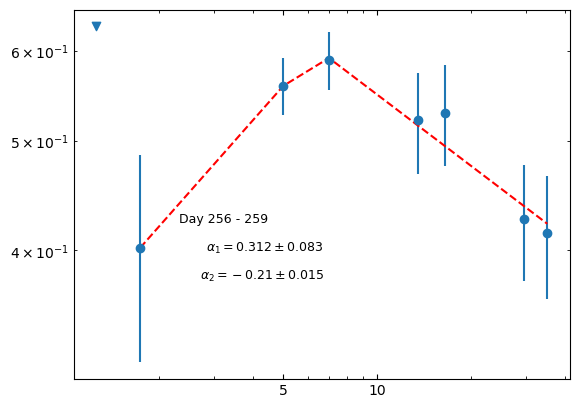

In [614]:
#plotting to check
fig,ax = plt.subplots()
mask = df14['Flux (mJy)'] > 3 * df14['eFlux (mJy)']  # apply detection threshold
mask2 = df14['Flux (mJy)'] < 3 * df14['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df14['Freq (GHz)'][mask], df14['Flux (mJy)'][mask], yerr=yerr14, fmt='o')
    ax.scatter(df14['Freq (GHz)'][mask2], (df14['Flux (mJy)'][mask2] + 3*df14['eFlux (mJy)'][mask2]), marker='v')
    
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 256 - 259', xy=(140, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    
    ax.plot(df14['Freq (GHz)'][mask], fw_BPL14(df14['Freq (GHz)'][mask]), 'r--')


    ax.annotate('${\u03B1_1 = 0.312 \\pm 0.083}$', xy=(180, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.annotate('${\u03B1_2 = -0.21 \\pm 0.015}$', xy=(180, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

    #ax.annotate('${\u03B1 = 0.194 \\pm 0.032}$', xy=(120, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 282 (df16)

In [615]:
#(work for anything with 3+ points)
mask = df16['Flux (mJy)'] > 3 * df16['eFlux (mJy)']  # apply detection threshold

x16 = df16['Freq (GHz)'][mask].values.tolist()
y16 = df16['Flux (mJy)'][mask].values.tolist()
yerr16 = df16['eFlux (mJy)'][mask].values.tolist()


In [616]:
yerr16 = error(yerr16, x16, y16)

In [617]:
PL16 =  PowerLaw1D(amplitude = y16[0], x_0= x16[0], alpha= 0) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit16 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model16 = fit16(PL16, x16, y16)


#weight is 1/error^2
y_weight16 = 1/ (np.power(yerr16, 2))  

# fit the data using the uncertainties as weights
fit_model_weights16 = fit16(PL16, x16, y16, weights=y_weight16)

fit_model_weights16


<PowerLaw1D(amplitude=0.51562892, x_0=1.84407199, alpha=0.07634228)>

In [618]:
fit16.fit_info

{'nfev': 10,
 'fvec': array([ 24.10052609, -18.49791082,  12.78447707]),
 'fjac': array([[-1.80877774e+03,  1.08392402e+03, -3.86108807e+01],
        [ 1.08392402e+03, -2.10392743e+02,  1.24721836e-12],
        [-3.86108807e+01, -2.90496339e-15,  7.39392048e-15]]),
 'ipvt': array([1, 3, 2], dtype=int32),
 'qtf': array([ 3.32753835e-04, -4.27262417e-04,  3.29613549e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': None,
 'njev': 6,
 'cov_x': array([[ 8.33488205e+24, -3.90458565e+26,  5.39119276e+09],
        [-3.90458565e+26,  1.82915475e+28, -2.52557549e+11],
        [ 5.39119276e+09, -2.52557549e+11,  2.60783047e-05]])}

In [619]:
#taking fvec
fvec16 = np.array([ 24.09984862, -18.4987269 ,  12.7845734 ])
var16 = np.var(fvec16)

#taking cov_x
cov_x16 = np.array([[ 3.07964020e+25, -1.56827942e+27,  2.36152642e+09],
        [-1.56827942e+27,  7.98632363e+28, -1.20258635e+11],
        [ 2.36152642e+09, -1.20258635e+11,  2.27723752e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag16 = stand(cov_x16*var16) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag16[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.0859750426332966


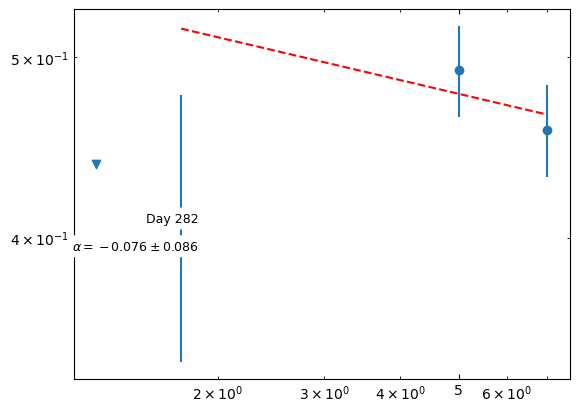

In [620]:
#plotting to check
fig,ax = plt.subplots()
mask = df16['Flux (mJy)'] > 3 * df16['eFlux (mJy)']  # apply detection threshold
mask2 = df16['Flux (mJy)'] < 3 * df16['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df16['Freq (GHz)'][mask], df16['Flux (mJy)'][mask], yerr=yerr16, fmt='o')
    ax.scatter(df16['Freq (GHz)'][mask2], (df16['Flux (mJy)'][mask2] + 3*df16['eFlux (mJy)'][mask2]), marker='v')
    
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 282', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df16['Freq (GHz)'][mask], fit_model_weights16(df16['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.076 \\pm 0.086}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 390 (df17)

In [621]:
#(work for anything with 3+ points)
mask = df17['Flux (mJy)'] > 3 * df17['eFlux (mJy)']  # apply detection threshold

x17 = df17['Freq (GHz)'][mask].values.tolist()
y17 = df17['Flux (mJy)'][mask].values.tolist()
yerr17 = df17['eFlux (mJy)'][mask].values.tolist()


In [622]:
yerr17 = error(yerr17, x17, y17)

In [623]:
PL17 =  PowerLaw1D(amplitude = y17[0], x_0= x17[0], alpha= -2.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit17 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model17 = fit17(PL17, x17, y17)


#weight is 1/error^2
y_weight17 = 1/ (np.power(yerr17, 2))  

# fit the data using the uncertainties as weights
fit_model_weights17 = fit17(PL17, x17, y17, weights=y_weight17)

fit_model_weights17


<PowerLaw1D(amplitude=0.14631728, x_0=671.12375489, alpha=0.02509843)>

In [624]:
fit17.fit_info

{'nfev': 44,
 'fvec': array([ -3.57030929,  31.12853712, -42.30995467,  16.59426375,
         20.35072054,  20.80812797]),
 'fjac': array([[-5.91625642e+03, -4.06763521e+03, -3.24207715e-02,
          1.38181515e-01,  1.06104935e-01,  1.17939961e-01],
        [-4.06763521e+03, -2.74074811e+02, -1.48652779e-18,
         -3.94203695e-01, -3.69945864e-01, -6.27647614e-01],
        [-3.24207715e-02, -1.48645149e-18,  1.10758739e-17,
          3.42948993e-01,  3.26664149e-01,  5.77976220e-01]]),
 'ipvt': array([1, 3, 2], dtype=int32),
 'qtf': array([ 9.16088113e-06, -1.77285290e-03, -2.51083536e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 2.44791713e+23, -4.46704528e+28,  2.42271301e+08],
        [-4.46704528e+28,  8.15162134e+33, -4.42105192e+13],
        [ 2.42271301e+08, -4.42105192e+13,  1.35523422e-05]]),
 'njev': 30,
 'cov_x': array([[ 2.44791713e+23, -4.46704528

In [625]:
#taking fvec
fvec17 = np.array([ -3.57030929,  31.12853712, -42.30995467,  16.59426375,
         20.35072054,  20.80812797])
var17 = np.var(fvec17)

#taking cov_x
cov_x17 = np.array([[ 2.44791713e+23, -4.46704528e+28,  2.42271301e+08],
        [-4.46704528e+28,  8.15162134e+33, -4.42105192e+13],
        [ 2.42271301e+08, -4.42105192e+13,  1.35523422e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag17 = stand(cov_x17*var17) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag17[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.09000103258274754


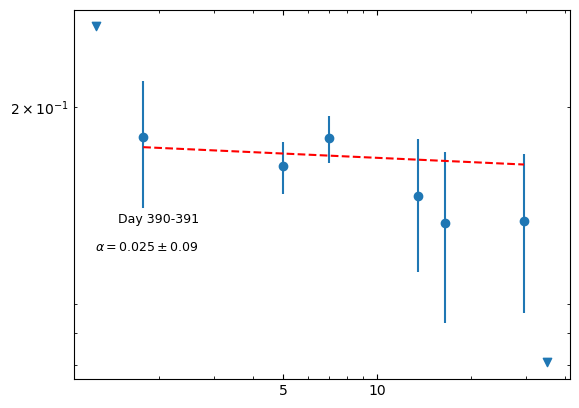

In [626]:
#plotting to check
fig,ax = plt.subplots()
mask = df17['Flux (mJy)'] > 3 * df17['eFlux (mJy)']  # apply detection threshold
mask2 = df17['Flux (mJy)'] < 3 * df17['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df17['Freq (GHz)'][mask], df17['Flux (mJy)'][mask], yerr=yerr17, fmt='o')
    ax.scatter(df17['Freq (GHz)'][mask2], (df17['Flux (mJy)'][mask2] + 3*df17['eFlux (mJy)'][mask2]), marker='v')
    
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 390-391', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df17['Freq (GHz)'][mask], fit_model_weights17(df17['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.025 \\pm 0.09}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


----

## Day 415 (df19)

In [627]:
#(work for anything with 3+ points)
mask = df19['Flux (mJy)'] > 3 * df19['eFlux (mJy)']  # apply detection threshold

x19 = df19['Freq (GHz)'][mask].values.tolist()
y19 = df19['Flux (mJy)'][mask].values.tolist()
yerr19 = df19['eFlux (mJy)'][mask].values.tolist()


In [628]:
yerr19 = error(yerr19, x19, y19)

In [629]:
PL19 =  PowerLaw1D(amplitude = y19[0], x_0= x19[0], alpha= 2,
                  bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit19 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model19 = fit19(PL19, x19, y19)


#weight is 1/error^2
y_weight19 = 1/ (np.power(yerr19, 2))  

# fit the data using the uncertainties as weights
fit_model_weights19 = fit19(PL19, x19, y19, weights=y_weight19)

fit_model_weights19


<PowerLaw1D(amplitude=0.165, x_0=5., alpha=0.14770808)>

In [630]:
fit19.fit_info

{'nfev': 6,
 'fvec': array([0.00000000e+00, 1.25160189e-12]),
 'fjac': array([[-5.39385970e+03,  6.62904269e-01],
        [ 1.31593506e+02,  1.48625693e+02]]),
 'ipvt': array([1, 2], dtype=int32),
 'qtf': array([-2.5504151e-05, -2.8805161e-05]),
 'message': 'The relative error between two consecutive iterates is at most 0.000000',
 'ierr': 2,
 'param_jac': None,
 'param_cov': None,
 'njev': 5,
 'cov_x': array([[6.13169025e-08, 1.10445246e-06],
        [1.10445246e-06, 4.52701796e-05]])}

In [631]:
#taking fvec
fvec19 = np.array([0.00000000e+00, 1.62876868e-12])
var19 = np.var(fvec19)

#taking cov_x
cov_x19 = np.array([[6.13169025e-08, 1.10445246e-06],
        [1.10445246e-06, 4.52701796e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    #sd3 = np.sqrt(diag[2])
    return(sd1,sd2)#,sd3)

diag19 = stand(cov_x19)#*var19) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag19[1]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.006728311794202168


In [632]:
#Error on alpha for only two data points
def two_points(Flux, Freq, Err):
    
    alpha = (np.log10(Flux[0]/Flux[1])) / (np.log10(Freq[0]/Freq[1]))
    
    
    der_s1 = 1 / (Flux[0] * np.log(Freq[0]/Freq[1]))
    der_s2 = -1 / (Flux[1] * np.log(Freq[0]/Freq[1]))
    
    
    err_alph_squared = (der_s1)**2 * (Err[0]**2) + (der_s2)**2 * (Err[1]**2) 
    err_alph = np.sqrt(err_alph_squared)
    
    return(alpha, err_alph)

In [633]:
alpha_err19 = two_points(y19,x19,yerr19)
print(alpha_err19)

(-0.14770808150873518, 0.41916438432605374)


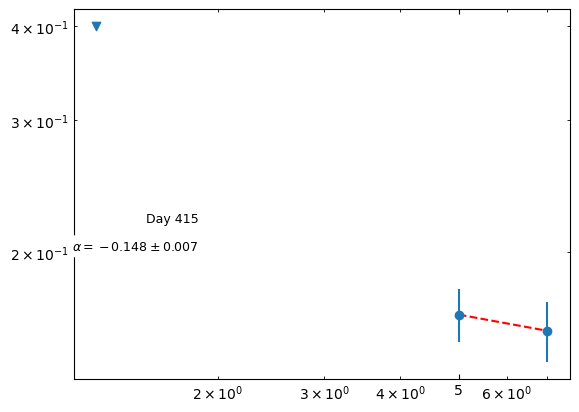

In [634]:
#plotting to check
fig,ax = plt.subplots()
mask = df19['Flux (mJy)'] > 3 * df19['eFlux (mJy)']  # apply detection threshold
mask2 = df19['Flux (mJy)'] < 3 * df19['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df19['Freq (GHz)'][mask], df19['Flux (mJy)'][mask], yerr=df19['eFlux (mJy)'][mask], fmt='o')
    ax.scatter(df19['Freq (GHz)'][mask2], (df19['Flux (mJy)'][mask2] + 3*df19['eFlux (mJy)'][mask2]), marker='v')
    
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 415', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df19['Freq (GHz)'][mask], fit_model_weights19(df19['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.148 \\pm 0.007}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 419 (df20)

In [635]:
#(work for anything with 3+ points)
mask = df20['Flux (mJy)'] > 3 * df20['eFlux (mJy)']  # apply detection threshold

x20 = df20['Freq (GHz)'][mask].values.tolist()
y20 = df20['Flux (mJy)'][mask].values.tolist()
yerr20 = df20['eFlux (mJy)'][mask].values.tolist()


In [636]:
yerr20 = error(yerr20, x20, y20)

In [637]:
PL20 =  PowerLaw1D(amplitude = y20[0], x_0= x20[0], alpha= -1, bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit20 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model20 = fit20(PL20, x20, y20)


#weight is 1/error^2
y_weight20 = 1/ (np.power(yerr20, 2))  

# fit the data using the uncertainties as weights
fit_model_weights20 = fit20(PL20, x20, y20, weights=y_weight20)

fit_model_weights20


<PowerLaw1D(amplitude=0.0657, x_0=13.5, alpha=-0.7714014)>

In [638]:
fit20.fit_info

{'nfev': 5,
 'fvec': array([0.0000000e+00, 2.8320571e-14]),
 'fjac': array([[-5.87332745e+03,  1.81130993e-01],
        [ 1.20606943e+01,  6.54840892e+01]]),
 'ipvt': array([1, 2], dtype=int32),
 'qtf': array([-3.70727994e-07, -2.01288454e-06]),
 'message': 'The relative error between two consecutive iterates is at most 0.000000',
 'ierr': 2,
 'param_jac': None,
 'param_cov': None,
 'njev': 4,
 'cov_x': array([[2.99722310e-08, 4.78868766e-07],
        [4.78868766e-07, 2.33199931e-04]])}

In [639]:
#taking fvec
fvec20 = np.array([0.00000000e+00, 3.13195881e-14])
var20 = np.var(fvec20)

#taking cov_x
cov_x20 = np.array([[2.99722310e-08, 4.78868766e-07],
        [4.78868766e-07, 2.33199931e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    #sd3 = np.sqrt(diag[2])
    return(sd1,sd2)#,sd3)

diag20 = stand(cov_x20)#*var20) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag20[1]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.015270885075855951


In [640]:
alpha_err20 = two_points(y20,x20,yerr20)
print(alpha_err20)

(0.7714013951028592, 0.39907800488658196)


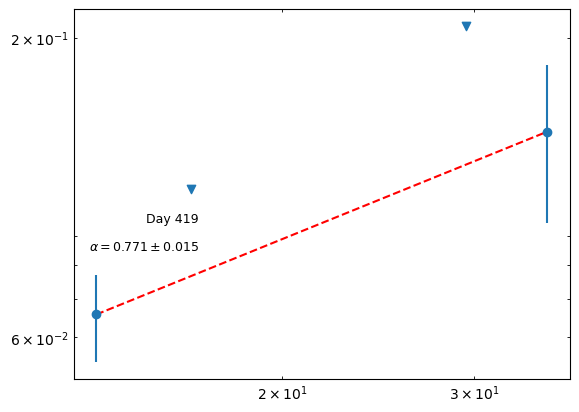

In [641]:
#plotting to check
fig,ax = plt.subplots()
mask = df20['Flux (mJy)'] > 3 * df20['eFlux (mJy)']  # apply detection threshold
mask2 =  df20['Flux (mJy)'] < 3 * df20['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df20['Freq (GHz)'][mask], df20['Flux (mJy)'][mask], yerr=df20['eFlux (mJy)'][mask], fmt='o')
    ax.scatter(df20['Freq (GHz)'][mask2], (df20['Flux (mJy)'][mask2] + 3*df20['eFlux (mJy)'][mask2]), marker='v')
    
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 419', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df20['Freq (GHz)'][mask], fit_model_weights20(df20['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.771 \\pm 0.015}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 475 (df22)

In [642]:
#(work for anything with 3+ points)
mask = df22['Flux (mJy)'] > 3 * df22['eFlux (mJy)']  # apply detection threshold

x22 = df22['Freq (GHz)'][mask].values.tolist()
y22 = df22['Flux (mJy)'][mask].values.tolist()
yerr22 = df22['eFlux (mJy)'][mask].values.tolist()


In [643]:
yerr22 = error(yerr22, x22, y22)

In [644]:
PL22 =  PowerLaw1D(amplitude = y22[0], x_0= x22[0], alpha= -2.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit22 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model22 = fit22(PL22, x22, y22)


#weight is 1/error^2
y_weight22 = 1/ (np.power(yerr22, 2))  

# fit the data using the uncertainties as weights
fit_model_weights22 = fit22(PL22, x22, y22, weights=y_weight22)

fit_model_weights22


<PowerLaw1D(amplitude=0.65385375, x_0=0.79887782, alpha=1.18067648)>

In [645]:
fit22.fit_info

{'nfev': 30,
 'fvec': array([ 0.21278365, -0.23474897,  0.01297477]),
 'fjac': array([[ 4.56452149e+02, -3.87484586e+02, -3.74442900e+02],
        [-3.87484586e+02, -6.96685015e+01, -6.73236476e+01],
        [-3.74442900e+02, -6.73236476e+01,  6.39488462e-14]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([3.86685671e-06, 6.95248769e-07, 3.17099831e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': None,
 'njev': 21,
 'cov_x': array([[ 2.28347842e+26, -2.36301099e+26,  1.64712051e+11],
        [-2.36301099e+26,  2.44531366e+26, -1.70448901e+11],
        [ 1.64712051e+11, -1.70448901e+11,  2.72082171e-04]])}

In [646]:
#taking fvec
fvec22 = np.array([ 0.21278365, -0.23474897,  0.01297477])
var22 = np.var(fvec22)

#taking cov_x
cov_x22 = np.array([[ 2.28347842e+26, -2.36301099e+26,  1.64712051e+11],
        [-2.36301099e+26,  2.44531366e+26, -1.70448901e+11],
        [ 1.64712051e+11, -1.70448901e+11,  2.72082171e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag22 = stand(cov_x22)#*var22) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag22[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.016494913488709177


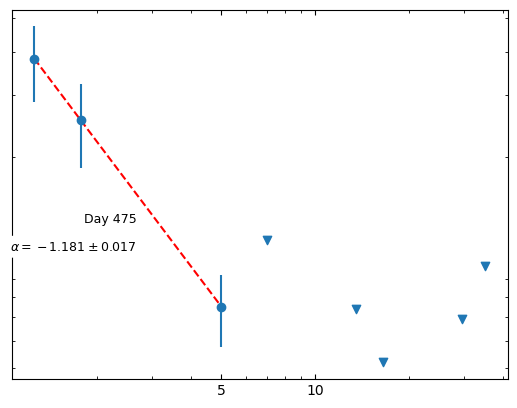

In [647]:
#plotting to check
fig,ax = plt.subplots()
mask = df22['Flux (mJy)'] > 3 * df22['eFlux (mJy)']  # apply detection threshold
mask2 = df22['Flux (mJy)'] < 3 * df22['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df22['Freq (GHz)'][mask], df22['Flux (mJy)'][mask], yerr=yerr22, fmt='o')
    ax.scatter(df22['Freq (GHz)'][mask2], (df22['Flux (mJy)'][mask2] + 3*df22['eFlux (mJy)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 475', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df22['Freq (GHz)'][mask], fit_model_weights22(df22['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -1.181 \\pm 0.017}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 611 (df24)

In [648]:
#(work for anything with 3+ points)
mask = df24['Flux (mJy)'] > 3 * df24['eFlux (mJy)']  # apply detection threshold

x24 = df24['Freq (GHz)'][mask].values.tolist()
y24 = df24['Flux (mJy)'][mask].values.tolist()
yerr24 = df24['eFlux (mJy)'][mask].values.tolist()


In [649]:
yerr24 = error(yerr24, x24, y24)

In [650]:
PL24 =  PowerLaw1D(amplitude = y24[0], x_0= x24[0], alpha= -2.5, bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit24 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model24 = fit24(PL24, x24, y24)


#weight is 1/error^2
y_weight24 = 1/ (np.power(yerr24, 2))  

# fit the data using the uncertainties as weights
fit_model_weights24 = fit24(PL24, x24, y24, weights=y_weight24)

fit_model_weights24


<PowerLaw1D(amplitude=0.0592, x_0=13.5, alpha=-0.31792997)>

In [651]:
fit24.fit_info

{'nfev': 6,
 'fvec': array([0., 0.]),
 'fjac': array([[-4.25517372e+03,  6.88507132e-01],
        [ 2.39629259e+01,  2.52410202e+01]]),
 'ipvt': array([1, 2], dtype=int32),
 'qtf': array([-1.92931707e-09, -2.03221975e-09]),
 'message': 'The relative error between two consecutive iterates is at most 0.000000',
 'ierr': 2,
 'param_jac': None,
 'param_cov': None,
 'njev': 5,
 'cov_x': array([[1.05006069e-07, 8.83911409e-06],
        [8.83911409e-06, 1.56958988e-03]])}

In [652]:
#taking fvec
fvec24 = np.array([0.00000000e+00, 4.28326784e-14])
var24 = np.var(fvec24)

#taking cov_x
cov_x24 = np.array([[1.05006069e-07, 8.83911409e-06],
        [8.83911409e-06, 1.56958988e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    #sd3 = np.sqrt(diag[2])
    return(sd1,sd2)#,sd3)

diag24 = stand(cov_x24)#*var24) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag24[1]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.03961804992676949


In [653]:
alpha_err24 = two_points(y24,x24,yerr24)
print(alpha_err24)

(0.3179299673541062, 2.1366411620265344)


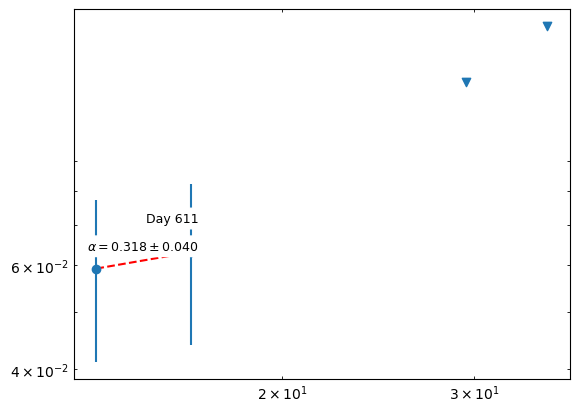

In [654]:
#plotting to check
fig,ax = plt.subplots()
mask = df24['Flux (mJy)'] > 3 * df24['eFlux (mJy)']  # apply detection threshold
mask2 = df24['Flux (mJy)'] < 3 * df24['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df24['Freq (GHz)'][mask], df24['Flux (mJy)'][mask], yerr=yerr24, fmt='o')
    ax.scatter(df24['Freq (GHz)'][mask2], (df24['Flux (mJy)'][mask2] + 3*df24['eFlux (mJy)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 611', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df24['Freq (GHz)'][mask], fit_model_weights24(df24['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.318 \\pm 0.040}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 687 (df25)

In [655]:
#(work for anything with 3+ points)
mask = df25['Flux (mJy)'] > 3 * df25['eFlux (mJy)']  # apply detection threshold

x25 = df25['Freq (GHz)'][mask].values.tolist()
y25 = df25['Flux (mJy)'][mask].values.tolist()
yerr25 = df25['eFlux (mJy)'][mask].values.tolist()


In [656]:
yerr25 = error(yerr25, x25, y25)

In [657]:
PL25 =  PowerLaw1D(amplitude = y25[0], x_0= x25[0], alpha= 0.3) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit25 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model25 = fit25(PL25, x25, y25)


#weight is 1/error^2
y_weight25 = 1/ (np.power(yerr25, 2))  

# fit the data using the uncertainties as weights
fit_model_weights25 = fit25(PL25, x25, y25, weights=y_weight25)

fit_model_weights25


<PowerLaw1D(amplitude=0.10006051, x_0=4.17652085, alpha=-0.05894521)>

In [658]:
fit25.fit_info

{'nfev': 15,
 'fvec': array([-30.62859961,  32.91619349, -18.57818722]),
 'fjac': array([[-3.06579935e+03,  1.47334454e+02,  4.38555049e+00],
        [ 1.47334454e+02,  1.25688931e+02,  4.84965564e-15],
        [ 4.38555049e+00,  1.27650198e-16, -4.25347685e-16]]),
 'ipvt': array([1, 3, 2], dtype=int32),
 'qtf': array([-2.95309214e-04,  1.80243001e-03,  4.86491104e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': None,
 'njev': 8,
 'cov_x': array([[ 1.13102611e+25,  7.90664502e+27, -8.03002135e+09],
        [ 7.90664502e+27,  5.52728493e+30, -5.61353341e+12],
        [-8.03002135e+09, -5.61353341e+12,  6.90014520e-05]])}

In [659]:
#taking fvec
fvec25 = np.array([-30.62859961,  32.91619349, -18.57818722])
var25 = np.var(fvec25)

#taking cov_x
cov_x25 = np.array([[ 1.13102611e+25,  7.90664502e+27, -8.03002135e+09],
        [ 7.90664502e+27,  5.52728493e+30, -5.61353341e+12],
        [-8.03002135e+09, -5.61353341e+12,  6.90014520e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag25 = stand(cov_x25*var25) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag25[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.2289135714396403


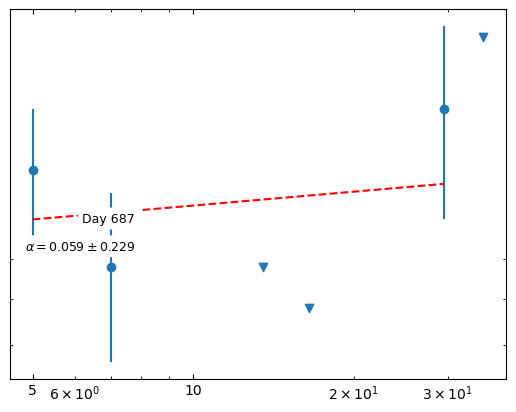

In [660]:
#plotting to check
fig,ax = plt.subplots()
mask = df25['Flux (mJy)'] > 3 * df25['eFlux (mJy)']  # apply detection threshold
mask2 = df25['Flux (mJy)'] < 3 * df25['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df25['Freq (GHz)'][mask], df25['Flux (mJy)'][mask], yerr=yerr25, fmt='o')
    ax.scatter(df25['Freq (GHz)'][mask2], (df25['Flux (mJy)'][mask2] + 3*df25['eFlux (mJy)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 687', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df25['Freq (GHz)'][mask], fit_model_weights25(df25['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.059 \\pm 0.229}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 747 (df26)

In [661]:
#(work for anything with 3+ points)
mask = df26['Flux (mJy)'] > 3 * df26['eFlux (mJy)']  # apply detection threshold

x26 = df26['Freq (GHz)'][mask].values.tolist()
y26 = df26['Flux (mJy)'][mask].values.tolist()
yerr26 = df26['eFlux (mJy)'][mask].values.tolist()


In [662]:
yerr26 = error(yerr26, x26, y26)

In [663]:
PL26 =  PowerLaw1D(amplitude = y26[0], x_0= x26[0], alpha= -2, bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit26 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model26 = fit26(PL26, x26, y26)


#weight is 1/error^2
y_weight26 = 1/ (np.power(yerr26, 2))  

# fit the data using the uncertainties as weights
fit_model_weights26 = fit26(PL26, x26, y26, weights=y_weight26)

fit_model_weights26


<PowerLaw1D(amplitude=0.0606, x_0=5., alpha=-0.06787928)>

In [664]:
fit26.fit_info

{'nfev': 6,
 'fvec': array([0., 0.]),
 'fjac': array([[-5.76521089e+03,  7.56410152e-01],
        [ 6.72592091e+01,  5.81616834e+01]]),
 'ipvt': array([1, 2], dtype=int32),
 'qtf': array([-9.49425870e-07, -8.21005891e-07]),
 'message': 'The relative error between two consecutive iterates is at most 0.000000',
 'ierr': 2,
 'param_jac': None,
 'param_cov': None,
 'njev': 5,
 'cov_x': array([[7.03209097e-08, 3.44875721e-06],
        [3.44875721e-06, 2.95614725e-04]])}

In [665]:
#taking fvec
fvec26 = np.array([0., 0.])
var26 = np.var(fvec26)

#taking cov_x
cov_x26 = np.array([[7.03209097e-08, 3.44875721e-06],
        [3.44875721e-06, 2.95614725e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    #sd3 = np.sqrt(diag[2])
    return(sd1,sd2)#,sd3)

diag26 = stand(cov_x26)#*var26) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag26[1]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.017193450060997068


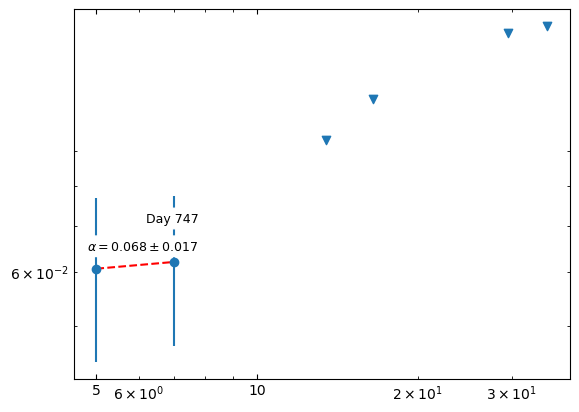

In [666]:
#plotting to check
fig,ax = plt.subplots()
mask = df26['Flux (mJy)'] > 3 * df26['eFlux (mJy)']  # apply detection threshold
mask2 = df26['Flux (mJy)'] < 3 * df26['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df26['Freq (GHz)'][mask], df26['Flux (mJy)'][mask], yerr=yerr26, fmt='o')
    ax.scatter(df26['Freq (GHz)'][mask2], (df26['Flux (mJy)'][mask2] + 3*df26['eFlux (mJy)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 747', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df26['Freq (GHz)'][mask], fit_model_weights26(df26['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.068 \\pm 0.017}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## All Together Now

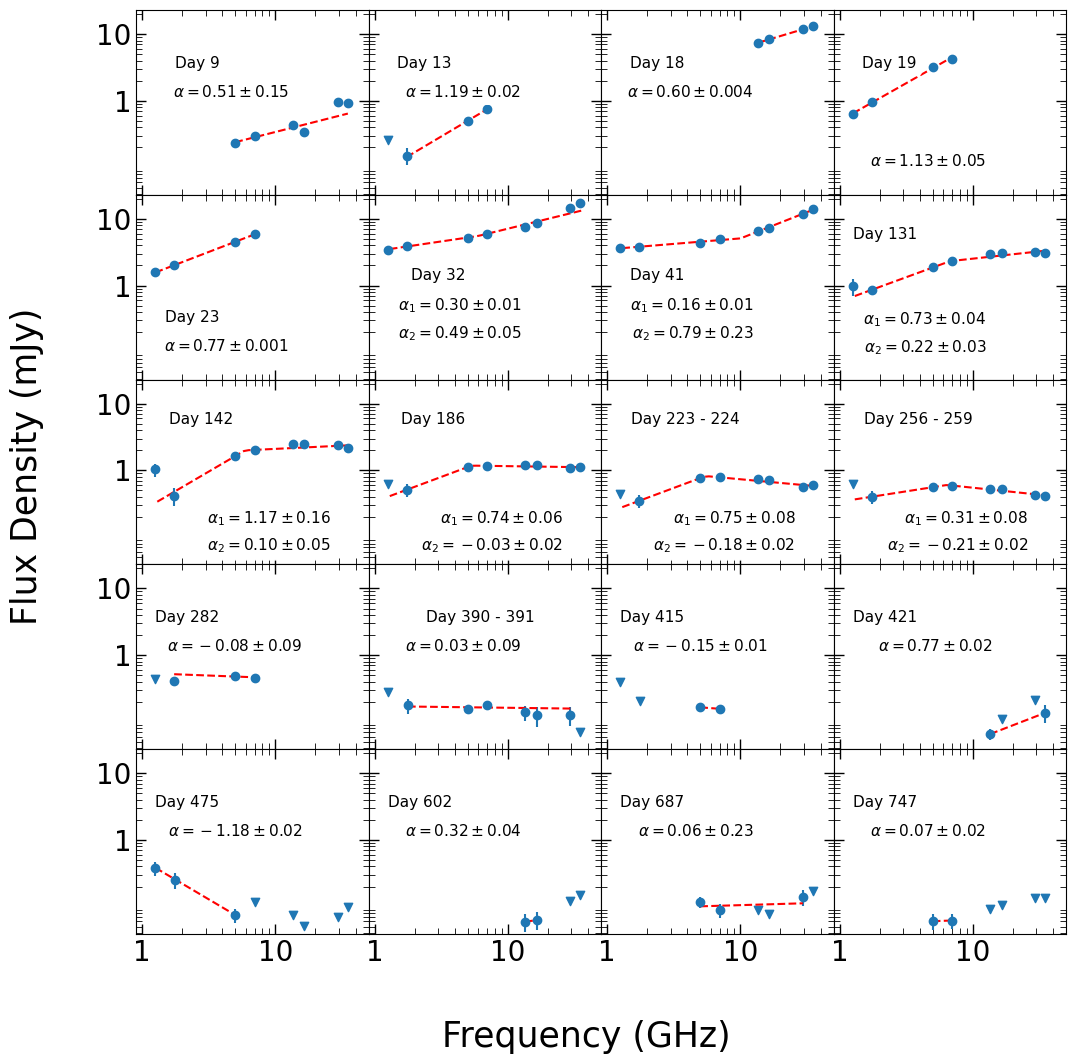

In [667]:
x_freq = np.arange(1.3,36,0.5)

#four by four

fig, ax = plt.subplots(5, 4, sharex='all', sharey='all',squeeze=True, width_ratios=None, height_ratios=None)
fig.set_size_inches(12,12)
fig.subplots_adjust(hspace=0, wspace=0)

#first row
mask = df2['Flux (mJy)'] > 3 * df2['eFlux (mJy)']  # apply detection threshold
mask2 = df2['Flux (mJy)'] < 3 * df2['eFlux (mJy)']  # apply non-detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,0].errorbar(df2['Freq (GHz)'][mask], df2['Flux (mJy)'][mask], yerr=yerr2, fmt='o')
    ax[0,0].scatter(df2['Freq (GHz)'][mask2], (df2['Flux (mJy)'][mask2] + 3*df2['eFlux (mJy)'][mask2]), marker='v')
    ax[0,0].set_xscale('log')
    ax[0,0].set_xticks([1, 10], labels=['1', '10'], fontsize=20)
    ax[0,0].set_yscale('log')
    ax[0,0].set_yticks([0.1,1, 10], labels=['0.1','1', '10'], fontsize=20)
    ax[0,0].annotate('Day 9', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[0,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
    ax[0,0].plot(df2['Freq (GHz)'][mask], fit_model_weights2(df2['Freq (GHz)'][mask]), 'r--')
    ax[0,0].annotate('${\u03B1 = 0.51 \\pm 0.15}$', xy=(110, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df3['Flux (mJy)'] > 3 * df3['eFlux (mJy)']  # apply detection threshold
mask2 = df3['Flux (mJy)'] < 3 * df3['eFlux (mJy)']  # apply non-detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,1].errorbar(df3['Freq (GHz)'][mask], df3['Flux (mJy)'][mask], yerr=yerr3, fmt='o')
    ax[0,1].scatter(df3['Freq (GHz)'][mask2], (df3['Flux (mJy)'][mask2] + 3*df3['eFlux (mJy)'][mask2]), marker='v')
    ax[0,1].set_xscale('log')
    ax[0,1].set_xticks([1, 10], labels=['1', '10'], fontsize=20)
    ax[0,1].set_yscale('log')
    ax[0,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[0,1].annotate('Day 13', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[0,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
    ax[0,1].plot(df3['Freq (GHz)'][mask], fit_model_weights3(df3['Freq (GHz)'][mask]), 'r--')
    ax[0,1].annotate('${\u03B1 = 1.19 \\pm 0.02}$', xy=(110, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df4['Flux (mJy)'] > 3 * df4['eFlux (mJy)']  # apply detection threshold
mask2 = df4['Flux (mJy)'] < 3 * df4['eFlux (mJy)']  # apply nondetection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,2].errorbar(df4['Freq (GHz)'][mask], df4['Flux (mJy)'][mask], yerr=yerr4, fmt='o')
    ax[0,2].scatter(df4['Freq (GHz)'][mask2], (df4['Flux (mJy)'][mask2] + 3*df4['eFlux (mJy)'][mask2]), marker='v')
    
    ax[0,2].set_xscale('log')
    ax[0,2].set_xticks([1, 10], labels=['1', '10'], fontsize=20)
    ax[0,2].set_yscale('log')
    ax[0,2].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[0,2].annotate('Day 18', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,2].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[0,2].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[0,2].plot(df4['Freq (GHz)'][mask], fit_model_weights4(df4['Freq (GHz)'][mask]), 'r--')
    ax[0,2].annotate('${\u03B1 = 0.60 \\pm 0.004}$', xy=(110, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


mask = df5['Flux (mJy)'] > 3 * df5['eFlux (mJy)']  # apply detection threshold
mask2 = df5['Flux (mJy)'] < 3 * df5['eFlux (mJy)']  # apply nondetection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,3].errorbar(df5['Freq (GHz)'][mask], df5['Flux (mJy)'][mask], yerr=yerr5, fmt='o')
    ax[0,3].scatter(df5['Freq (GHz)'][mask2], (df5['Flux (mJy)'][mask2] + 3*df5['eFlux (mJy)'][mask2]), marker='v')
    ax[0,3].set_xscale('log')
    ax[0,3].set_xticks([1, 10], labels=['1', '10'], fontsize=20)
    ax[0,3].set_yscale('log')
    ax[0,3].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[0,3].annotate('Day 19', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,3].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[0,3].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[0,3].plot(df5['Freq (GHz)'][mask], fit_model_weights5(df5['Freq (GHz)'][mask]), 'r--')
    ax[0,3].annotate('${\u03B1 = 1.13 \\pm 0.05}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


#second row
mask = df6['Flux (mJy)'] > 3 * df6['eFlux (mJy)']  # apply detection threshold
mask2 = df6['Flux (mJy)'] < 3 * df6['eFlux (mJy)']  # apply nondetection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,0].errorbar(df6['Freq (GHz)'][mask], df6['Flux (mJy)'][mask], yerr=yerr6, fmt='o')
    ax[1,0].scatter(df6['Freq (GHz)'][mask2], (df6['Flux (mJy)'][mask2] + 3*df6['eFlux (mJy)'][mask2]), marker='v')
    ax[1,0].set_xscale('log')
    ax[1,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize=20)
    ax[1,0].set_yscale('log')
    ax[1,0].set_yticks([0.1,1, 10], labels=['0.1','1', '10'], fontsize=20)
    ax[1,0].annotate('Day 23', xy=(60, 50), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[1,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[1,0].plot(df6['Freq (GHz)'][mask], fit_model_weights6(df6['Freq (GHz)'][mask]), 'r--')
    ax[1,0].annotate('${\u03B1 = 0.77 \\pm 0.001}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df7['Flux (mJy)'] > 3 * df7['eFlux (mJy)']  # apply detection threshold
mask2 = df7['Flux (mJy)'] < 3 * df7['eFlux (mJy)']  # apply nondetection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,1].errorbar(df7['Freq (GHz)'][mask], df7['Flux (mJy)'][mask], yerr=yerr7, fmt='o')
    ax[1,1].scatter(df7['Freq (GHz)'][mask2], (df7['Flux (mJy)'][mask2] + 3*df7['eFlux (mJy)'][mask2]), marker='v')
   
    ax[1,1].set_xscale('log')
    ax[1,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1,1].set_yscale('log')
    ax[1,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1,1].annotate('Day 32', xy=(70, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[1,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
    ax[1,1].plot(x_freq, fw_BPL7(x_freq), 'r--')
    #ax[1,1].plot(df7['Freq (GHz)'][mask], fw_BPL7(df7['Freq (GHz)'][mask]), 'r--')
    ax[1,1].annotate('${\u03B1_1 = 0.30 \\pm 0.01}$', xy=(110, 60), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,1].annotate('${\u03B1_2 = 0.49 \\pm 0.05}$', xy=(110, 40), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

    #ax[1,1].annotate('${\u03B1 = 0.312 \\pm 0.011}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df8['Flux (mJy)'] > 3 * df8['eFlux (mJy)']  # apply detection threshold
mask2 = df8['Flux (mJy)'] < 3 * df8['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,2].errorbar(df8['Freq (GHz)'][mask], df8['Flux (mJy)'][mask], yerr=yerr8, fmt='o')
    ax[1,2].scatter(df8['Freq (GHz)'][mask2], (df8['Flux (mJy)'][mask2] + 3*df8['eFlux (mJy)'][mask2]), marker='v')
    
    ax[1,2].set_xscale('log')
    ax[1,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1,2].set_yscale('log')
    ax[1,2].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1,2].annotate('Day 41', xy=(60, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,2].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[1,2].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
    ax[1,2].plot(x_freq, fw_BPL8(x_freq), 'r--')
    #ax[1,2].plot(df8['Freq (GHz)'][mask], fw_BPL8(df8['Freq (GHz)'][mask]), 'r--')
    ax[1,2].annotate('${\u03B1_1 = 0.16 \\pm 0.01}$', xy=(110, 60), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,2].annotate('${\u03B1_2 = 0.79 \\pm 0.23}$', xy=(110, 40), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

    #ax[1,2].annotate('${\u03B1 = 0.176 \\pm 0.020}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df9['Flux (mJy)'] > 3 * df9['eFlux (mJy)']  # apply detection threshold
mask2 = df9['Flux (mJy)'] < 3 * df9['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,3].errorbar(df9['Freq (GHz)'][mask], df9['Flux (mJy)'][mask], yerr=yerr9, fmt='o')
    ax[1,3].scatter(df9['Freq (GHz)'][mask2], (df9['Flux (mJy)'][mask2] + 3*df9['eFlux (mJy)'][mask2]), marker='v')
   
    ax[1,3].set_xscale('log')
    ax[1,3].set_xticks([1, 10], labels=['1', '10'], fontsize=20)
    ax[1,3].set_yscale('log')
    ax[1,3].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1,3].annotate('Day 131', xy=(60, 110), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,3].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[1,3].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
    ax[1,3].plot(x_freq, fw_BPL9(x_freq), 'r--')
    #ax[1,3].plot(df9['Freq (GHz)'][mask], fw_BPL9(df9['Freq (GHz)'][mask]), 'r--')
    ax[1,3].annotate('${\u03B1_1 = 0.73 \\pm 0.04}$', xy=(110, 50), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,3].annotate('${\u03B1_2 = 0.22 \\pm 0.03}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
   
    #ax[1,3].annotate('${\u03B1 = 0.465 \\pm 0.074}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


#third row

mask = df10['Flux (mJy)'] > 3 * df10['eFlux (mJy)']  # apply detection threshold
mask2 = df10['Flux (mJy)'] < 3 * df10['eFlux (mJy)']  # apply nondetection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,0].errorbar(df10['Freq (GHz)'][mask], df10['Flux (mJy)'][mask], yerr=yerr10, fmt='o')
    ax[2,0].scatter(df10['Freq (GHz)'][mask2], (df10['Flux (mJy)'][mask2] + 3*df10['eFlux (mJy)'][mask2]), marker='v')

    ax[2,0].set_xscale('log')
    ax[2,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize=20)
    ax[2,0].set_yscale('log')
    ax[2,0].set_yticks([0.1,1, 10], labels=['0.1','1', '10'], fontsize=20)
    ax[2,0].annotate('Day 142', xy=(70, 110), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[2,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
    ax[2,0].plot(x_freq, fw_BPL10(x_freq), 'r--')
    #ax[2,0].plot(df10['Freq (GHz)'][mask], fw_BPL10(df10['Freq (GHz)'][mask]), 'r--')
    ax[2,0].annotate('${\u03B1_1 = 1.17 \\pm 0.16}$', xy=(140, 40), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,0].annotate('${\u03B1_2 = 0.10 \\pm 0.05}$', xy=(140, 20), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

    #ax[2,0].annotate('${\u03B1 = 0.371 \\pm 0.153}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df11['Flux (mJy)'] > 3 * df11['eFlux (mJy)']  # apply detection threshold
mask2 = df11['Flux (mJy)'] < 3 * df11['eFlux (mJy)']  # apply nondetection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,1].errorbar(df11['Freq (GHz)'][mask], df11['Flux (mJy)'][mask], yerr=yerr11, fmt='o')
    ax[2,1].scatter(df11['Freq (GHz)'][mask2], (df11['Flux (mJy)'][mask2] + 3*df11['eFlux (mJy)'][mask2]), marker='v')
    
    ax[2,1].set_xscale('log')
    ax[2,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2,1].set_yscale('log')
    ax[2,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[2,1].annotate('Day 186', xy=(70, 110), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[2,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
    ax[2,1].plot(x_freq, fw_BPL11(x_freq), 'r--')
    #ax[2,1].plot(df11['Freq (GHz)'][mask], fw_BPL11(df11['Freq (GHz)'][mask]), 'r--')
    ax[2,1].annotate('${\u03B1_1 = 0.74 \\pm 0.06}$', xy=(140, 40), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,1].annotate('${\u03B1_2 = -0.03 \\pm 0.02}$', xy=(140, 20), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

    #ax[2,1].annotate('${\u03B1 = 0.078 \\pm 0.067}$', xy=(110, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df12['Flux (mJy)'] > 3 * df12['eFlux (mJy)']  # apply detection threshold
mask2 = df12['Flux (mJy)'] < 3 * df12['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,2].errorbar(df12['Freq (GHz)'][mask], df12['Flux (mJy)'][mask], yerr=yerr12, fmt='o')
    ax[2,2].scatter(df12['Freq (GHz)'][mask2], (df12['Flux (mJy)'][mask2] + 3*df12['eFlux (mJy)'][mask2]), marker='v')
  
    ax[2,2].set_xscale('log')
    ax[2,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2,2].set_yscale('log')
    ax[2,2].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[2,2].annotate('Day 223 - 224', xy=(100, 110), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,2].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[2,2].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
    ax[2,2].plot(x_freq, fw_BPL12(x_freq), 'r--')
    #ax[2,2].plot(df12['Freq (GHz)'][mask], fw_BPL12(df12['Freq (GHz)'][mask]), 'r--')
    ax[2,2].annotate('${\u03B1_1 = 0.75 \\pm 0.08}$', xy=(140, 40), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,2].annotate('${\u03B1_2 = -0.18 \\pm 0.02}$', xy=(140, 20), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

    #ax[2,2].annotate('${\u03B1 = 0.342 \\pm 0.151}$', xy=(110, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df14['Flux (mJy)'] > 3 * df14['eFlux (mJy)']  # apply detection threshold
mask2 = df14['Flux (mJy)'] < 3 * df14['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,3].errorbar(df14['Freq (GHz)'][mask], df14['Flux (mJy)'][mask], yerr=yerr14, fmt='o')
    ax[2,3].scatter(df14['Freq (GHz)'][mask2], (df14['Flux (mJy)'][mask2] + 3*df14['eFlux (mJy)'][mask2]), marker='v')
    
    ax[2,3].set_xscale('log')
    ax[2,3].set_xticks([1, 10], labels=['1', '10'], fontsize=20)
    ax[2,3].set_yscale('log')
    ax[2,3].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'], fontsize=20)
    ax[2,3].annotate('Day 256 - 259', xy=(100, 110), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,3].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[2,3].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
    ax[2,3].plot(x_freq, fw_BPL14(x_freq), 'r--')
    #ax[2,3].plot(df14['Freq (GHz)'][mask], fw_BPL14(df14['Freq (GHz)'][mask]), 'r--')
    ax[2,3].annotate('${\u03B1_1 = 0.31 \\pm 0.08}$', xy=(140, 40), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,3].annotate('${\u03B1_2 = -0.21 \\pm 0.02}$', xy=(140, 20), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

    #ax[2,3].annotate('${\u03B1 = 0.194 \\pm 0.032}$', xy=(110, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


#fourth row

mask = df16['Flux (mJy)'] > 3 * df16['eFlux (mJy)']  # apply detection threshold
mask2 = df16['Flux (mJy)'] < 3 * df16['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3,0].errorbar(df16['Freq (GHz)'][mask], df16['Flux (mJy)'][mask], yerr=yerr16, fmt='o')
    ax[3,0].scatter(df16['Freq (GHz)'][mask2], (df16['Flux (mJy)'][mask2] + 3*df16['eFlux (mJy)'][mask2]), marker='v')
    
    ax[3,0].set_xscale('log')
    ax[3,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3,0].set_yscale('log')
    ax[3,0].set_yticks([0.1,1, 10], labels=['0.1','1', '10'], fontsize=20)
    ax[3,0].annotate('Day 282', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[3,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[3,0].plot(df16['Freq (GHz)'][mask], fit_model_weights16(df16['Freq (GHz)'][mask]), 'r--')
    ax[3,0].annotate('${\u03B1 = -0.08 \\pm 0.09}$', xy=(120, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df17['Flux (mJy)'] > 3 * df17['eFlux (mJy)']  # apply detection threshold
mask2 = df17['Flux (mJy)'] < 3 * df17['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3,1].errorbar(df17['Freq (GHz)'][mask], df17['Flux (mJy)'][mask], yerr=yerr17, fmt='o')
    ax[3,1].scatter(df17['Freq (GHz)'][mask2], (df17['Flux (mJy)'][mask2] + 3*df17['eFlux (mJy)'][mask2]), marker='v')
    
    ax[3,1].set_xscale('log')
    ax[3,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3,1].set_yscale('log')
    ax[3,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[3,1].annotate('Day 390 - 391', xy=(120, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[3,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[3,1].plot(df17['Freq (GHz)'][mask], fit_model_weights17(df17['Freq (GHz)'][mask]), 'r--')
    ax[3,1].annotate('${\u03B1 = 0.03 \\pm 0.09}$', xy=(110, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


mask = df19['Flux (mJy)'] > 3 * df19['eFlux (mJy)']  # apply detection threshold
mask2 = df19['Flux (mJy)'] < 3 * df19['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3,2].errorbar(df19['Freq (GHz)'][mask], df19['Flux (mJy)'][mask], yerr=df19['eFlux (mJy)'][mask], fmt='o')
    ax[3,2].scatter(df19['Freq (GHz)'][mask2], (df19['Flux (mJy)'][mask2] + 3*df19['eFlux (mJy)'][mask2]), marker='v')
    
    ax[3,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3,2].set_yscale('log')
    ax[3,2].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[3,2].annotate('Day 415', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,2].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[3,2].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[3,2].plot(df19['Freq (GHz)'][mask], fit_model_weights19(df19['Freq (GHz)'][mask]), 'r--')
    ax[3,2].annotate('${\u03B1 = -0.15 \\pm 0.01}$', xy=(120, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df20['Flux (mJy)'] > 3 * df20['eFlux (mJy)']  # apply detection threshold
mask2 =  df20['Flux (mJy)'] < 3 * df20['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3,3].errorbar(df20['Freq (GHz)'][mask], df20['Flux (mJy)'][mask], yerr=df20['eFlux (mJy)'][mask], fmt='o')
    ax[3,3].scatter(df20['Freq (GHz)'][mask2], (df20['Flux (mJy)'][mask2] + 3*df20['eFlux (mJy)'][mask2]), marker='v')
    
    ax[3,3].set_xscale('log')
    ax[3,3].set_xticks([1, 10], labels=['1', '10'], fontsize=20)
    ax[3,3].set_yscale('log')
    ax[3,3].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[3,3].annotate('Day 421', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,3].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[3,3].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[3,3].plot(df20['Freq (GHz)'][mask], fit_model_weights20(df20['Freq (GHz)'][mask]), 'r--')
    ax[3,3].annotate('${\u03B1 = 0.77 \\pm 0.02}$', xy=(115, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

#fifth row

mask = df22['Flux (mJy)'] > 3 * df22['eFlux (mJy)']  # apply detection threshold
mask2 = df22['Flux (mJy)'] < 3 * df22['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4,0].errorbar(df22['Freq (GHz)'][mask], df22['Flux (mJy)'][mask], yerr=yerr22, fmt='o')
    ax[4,0].scatter(df22['Freq (GHz)'][mask2], (df22['Flux (mJy)'][mask2] + 3*df22['eFlux (mJy)'][mask2]), marker='v')
   
    ax[4,0].set_xscale('log')
    ax[4,0].set_xticks([1, 10], labels=['1', '10'], fontsize=20)
    ax[4,0].set_xlim(left=0.9)
    ax[4,0].set_yscale('log')
    ax[4,0].set_yticks([0.1,1, 10], labels=['0.1','1', '10'], fontsize=20)
    ax[4,0].annotate('Day 475', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[4,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[4,0].plot(df22['Freq (GHz)'][mask], fit_model_weights22(df22['Freq (GHz)'][mask]), 'r--')
    ax[4,0].annotate('${\u03B1 = -1.18 \\pm 0.02}$', xy=(120, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df24['Flux (mJy)'] > 3 * df24['eFlux (mJy)']  # apply detection threshold
mask2 = df24['Flux (mJy)'] < 3 * df24['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4,1].errorbar(df24['Freq (GHz)'][mask], df24['Flux (mJy)'][mask], yerr=yerr24, fmt='o')
    ax[4,1].scatter(df24['Freq (GHz)'][mask2], (df24['Flux (mJy)'][mask2] + 3*df24['eFlux (mJy)'][mask2]), marker='v')
   
    ax[4,1].set_xscale('log')
    ax[4,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize=20)
    ax[4,1].set_xlim(left=0.9)
    ax[4,1].set_yscale('log')
    ax[4,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'], fontsize=20)
    ax[4,1].annotate('Day 602', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[4,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[4,1].plot(df24['Freq (GHz)'][mask], fit_model_weights24(df24['Freq (GHz)'][mask]), 'r--')
    ax[4,1].annotate('${\u03B1 = 0.32 \\pm 0.04}$', xy=(110, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df25['Flux (mJy)'] > 3 * df25['eFlux (mJy)']  # apply detection threshold
mask2 = df25['Flux (mJy)'] < 3 * df25['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4,2].errorbar(df25['Freq (GHz)'][mask], df25['Flux (mJy)'][mask], yerr=yerr25, fmt='o')
    ax[4,2].scatter(df25['Freq (GHz)'][mask2], (df25['Flux (mJy)'][mask2] + 3*df25['eFlux (mJy)'][mask2]), marker='v')
    
    ax[4,2].set_xscale('log')
    ax[4,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize=20)
    ax[4,2].set_xlim(left=0.9)
    ax[4,2].set_yscale('log')
    ax[4,2].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'], fontsize=20)
    ax[4,2].annotate('Day 687', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,2].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[4,2].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[4,2].plot(df25['Freq (GHz)'][mask], fit_model_weights25(df25['Freq (GHz)'][mask]), 'r--')
    ax[4,2].annotate('${\u03B1 = 0.06 \\pm 0.23}$', xy=(110, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df26['Flux (mJy)'] > 3 * df26['eFlux (mJy)']  # apply detection threshold
mask2 = df26['Flux (mJy)'] < 3 * df26['eFlux (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4,3].errorbar(df26['Freq (GHz)'][mask], df26['Flux (mJy)'][mask], yerr=yerr26, fmt='o')
    ax[4,3].scatter(df26['Freq (GHz)'][mask2], (df26['Flux (mJy)'][mask2] + 3*df26['eFlux (mJy)'][mask2]), marker='v')
    ax[4,3].set_xscale('log')
    ax[4,3].set_xticks([1, 10], labels=['1', '10'], fontsize=20)
    ax[4,3].set_xlim(left=0.9)
    ax[4,3].set_yscale('log')
    ax[4,3].set_yticks([1, 10], labels=['1', '10'], fontsize=20)
    ax[4,3].annotate('Day 747', xy=(60, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,3].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[4,3].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[4,3].plot(df26['Freq (GHz)'][mask], fit_model_weights26(df26['Freq (GHz)'][mask]), 'r--')
    ax[4,3].annotate('${\u03B1 = 0.07 \\pm 0.02}$', xy=(110, 80), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))



fig.supxlabel("Frequency (GHz)", fontsize=25)
fig.supylabel("Flux Density (mJy)", fontsize=25)
plt.savefig("V392Per_SI.png")
#plt.legend()
plt.show();